In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Data**

In [ ]:
import pandas as pd
import numpy as np
import math
 
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Technocolabs/Bondora_preprocessed.csv")

In [ ]:
df

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
77389                  2515        0    485.0000               True   
77390                  1880        0   1120.0000              False   
77391                  1975        0    525.0000               True   
77392                  1840        0   1160.0000              False   
77393                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
77389                    Income Verified      Finnish   37   Male  Finland   
77390                    Income Verified      Finnish   35   Male  Finland   
77391                  Income Unverified      Finnish   40   Male  Finland   
77392           Income Expenses Verified     Estonian   47  Woman  Estonia   
77393           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408     30.00            12      130.393314   
1           191.7349   140.6057     25.00             1      130.393314   
2           319.5582   319.5409     25.00            20      130.393314   
3           127.8233    57.5205     45.00            15      130.393314   
4           319.5582   319.5436     30.00            12      130.393314   
...              ...        ...       ...           ...             ...   
77389      3000.0000  3000.0000     31.01            60      107.680000   
77390      3000.0000  3000.0000     18.25            60       85.330000   
77391      2500.0000  2500.0000     24.83            60       80.420000   
77392      3000.0000  3000.0000     17.74            60       84.510000   
77393      3000.0000  3000.0000     30.50            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
77389  Loan Consolidation  Vocational Education        Single   
77390    Home Improvement  Vocational Education        Single   
77391  Loan Consolidation  Vocational Education       Married   
77392               Other      Higher Education       Married   
77393  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
77389   Fully Employed                    MoreThan5Years   
77390   Fully Employed                    MoreThan5Year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  fl

**Re-Converting Categorical Variables**

In [ ]:
cat_cols=['VerificationType','LanguageCode','Gender','Country','UseOfLoan','Education','MaritalStatus','EmploymentStatus',
          'EmploymentDurationCurrentEmployer','OccupationArea','HomeOwnershipType','Rating','CreditScoreEsMicroL']

for col in cat_cols:
  df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   BidsPortfolioManager                    77394 non-null  int64   
 1   BidsApi                                 77394 non-null  int64   
 2   BidsManual                              77394 non-null  float64 
 3   NewCreditCustomer                       77394 non-null  bool    
 4   VerificationType                        77394 non-null  category
 5   LanguageCode                            77394 non-null  category
 6   Age                                     77394 non-null  int64   
 7   Gender                                  77394 non-null  category
 8   Country                                 77394 non-null  category
 9   AppliedAmount                           77394 non-null  float64 
 10  Amount                                  77394 

In [ ]:
# To test Modeling Performence with Random Forest after each step
from sklearn.linear_model import LinearRegression

def Test_Performence(X, y):

  X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y, random_state=0 )

  lr = LinearRegression()

  lr.fit(X_train,y_train)

  print("Linear Regression Test Set Accuracy: " , lr.score(X_test,y_test), "\n" )

  # To plot Feature Importance

  results = list(zip(X, lr.coef_))

  importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])

  importance = importance.sort_values(by="Coefficient", ascending=False)

  plt.figure(figsize=[15,10])

  sns.barplot(x = importance.Coefficient, y = importance.Feature)

  plt.title("Linear Regression Coefficients")


# **Creating Repayment Years Column**

In [ ]:
Reg_DF = df[["Amount","Interest","MonthlyPayment"]]
Reg_DF

Amount  Interest  MonthlyPayment
0       115.0408     30.00      130.393314
1       140.6057     25.00      130.393314
2       319.5409     25.00      130.393314
3        57.5205     45.00      130.393314
4       319.5436     30.00      130.393314
...          ...       ...             ...
77389  3000.0000     31.01      107.680000
77390  3000.0000     18.25       85.330000
77391  2500.0000     24.83       80.420000
77392  3000.0000     17.74       84.510000
77393  3000.0000     30.50      106.740000

[77394 rows x 3 columns]

In [ ]:
# Calculating Toal Loan Amount after Interest

Reg_DF["TotalAmount"] = Reg_DF["Amount"].values + ( (Reg_DF["Interest"].values/100) * Reg_DF["Amount"].values )
Reg_DF["TotalAmount"]

0         149.553040
1         175.757125
2         399.426125
3          83.404725
4         415.406680
            ...     
77389    3930.300000
77390    3547.500000
77391    3120.750000
77392    3532.200000
77393    3915.000000
Name: TotalAmount, Length: 77394, dtype: float64

In [ ]:
Reg_DF = Reg_DF[Reg_DF["MonthlyPayment"] != 0].reset_index(drop=True)

In [ ]:
Reg_DF[Reg_DF["MonthlyPayment"] == 0]

Empty DataFrame
Columns: [Amount, Interest, MonthlyPayment, TotalAmount]
Index: []

In [ ]:
Reg_DF = Reg_DF[Reg_DF["MonthlyPayment"].notnull()].reset_index(drop=True)

In [ ]:
Reg_DF.isna().sum()

Amount            0
Interest          0
MonthlyPayment    0
TotalAmount       0
dtype: int64

In [ ]:
Reg_DF

Amount  Interest  MonthlyPayment  TotalAmount
0       115.0408     30.00      130.393314   149.553040
1       140.6057     25.00      130.393314   175.757125
2       319.5409     25.00      130.393314   399.426125
3        57.5205     45.00      130.393314    83.404725
4       319.5436     30.00      130.393314   415.406680
...          ...       ...             ...          ...
73899  3000.0000     31.01      107.680000  3930.300000
73900  3000.0000     18.25       85.330000  3547.500000
73901  2500.0000     24.83       80.420000  3120.750000
73902  3000.0000     17.74       84.510000  3532.200000
73903  3000.0000     30.50      106.740000  3915.000000

[73904 rows x 4 columns]

In [ ]:
# Calculating how much months to pay the loan then dividing by 12 to get the year

Months = []

Counter = 1

Reg_DF_Copy = Reg_DF[["TotalAmount","MonthlyPayment"]]

for index, row in Reg_DF_Copy.iterrows():

    Current_EMI = row["MonthlyPayment"]
    
    while( Current_EMI < row["TotalAmount"]):
      
      Counter = Counter + 1

      Current_EMI += Current_EMI
      
    Months.append(Counter/12)

    Counter = 1

In [ ]:
len(Months)

73904

In [ ]:
pd.Series(Months)

0        0.166667
1        0.166667
2        0.250000
3        0.083333
4        0.250000
           ...   
73899    0.583333
73900    0.583333
73901    0.583333
73902    0.583333
73903    0.583333
Length: 73904, dtype: float64

In [ ]:
Reg_DF["RepaymentYears"] = pd.Series(Months)

In [ ]:
Reg_DF["RepaymentYears"].max()

0.6666666666666666

In [ ]:
Reg_DF

Amount  Interest  MonthlyPayment  TotalAmount  RepaymentYears
0       115.0408     30.00      130.393314   149.553040        0.166667
1       140.6057     25.00      130.393314   175.757125        0.166667
2       319.5409     25.00      130.393314   399.426125        0.250000
3        57.5205     45.00      130.393314    83.404725        0.083333
4       319.5436     30.00      130.393314   415.406680        0.250000
...          ...       ...             ...          ...             ...
73899  3000.0000     31.01      107.680000  3930.300000        0.583333
73900  3000.0000     18.25       85.330000  3547.500000        0.583333
73901  2500.0000     24.83       80.420000  3120.750000        0.583333
73902  3000.0000     17.74       84.510000  3532.200000        0.583333
73903  3000.0000     30.50      106.740000  3915.000000        0.583333

[73904 rows x 5 columns]

In [ ]:
Reg_DF.drop(columns="TotalAmount", inplace=True)
Reg_DF

Amount  Interest  MonthlyPayment  RepaymentYears
0       115.0408     30.00      130.393314        0.166667
1       140.6057     25.00      130.393314        0.166667
2       319.5409     25.00      130.393314        0.250000
3        57.5205     45.00      130.393314        0.083333
4       319.5436     30.00      130.393314        0.250000
...          ...       ...             ...             ...
73899  3000.0000     31.01      107.680000        0.583333
73900  3000.0000     18.25       85.330000        0.583333
73901  2500.0000     24.83       80.420000        0.583333
73902  3000.0000     17.74       84.510000        0.583333
73903  3000.0000     30.50      106.740000        0.583333

[73904 rows x 4 columns]

In [ ]:
(Reg_DF["RepaymentYears"]).value_counts()

0.500000    39726
0.583333    22760
0.416667     6377
0.333333     2628
0.250000     1192
0.166667      609
0.083333      442
0.666667      170
Name: RepaymentYears, dtype: int64

In [ ]:
(Reg_DF["RepaymentYears"] * 12).value_counts()

6.0    39726
7.0    22760
5.0     6377
4.0     2628
3.0     1192
2.0      609
1.0      442
8.0      170
Name: RepaymentYears, dtype: int64

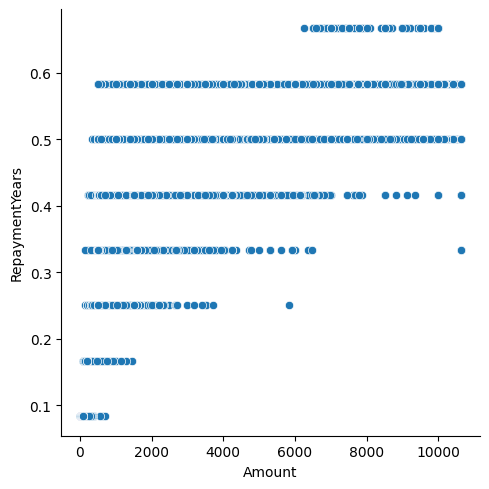

In [ ]:
# plt.figure(figsize=(25,10))

sns.relplot(x="Amount" , y="RepaymentYears" ,data=Reg_DF )

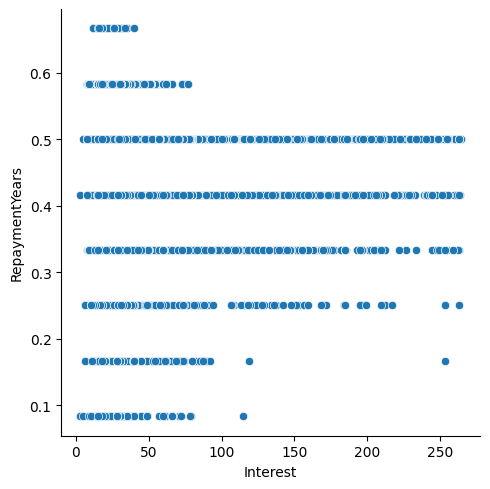

In [ ]:
sns.relplot(x="Interest" , y="RepaymentYears" ,data=Reg_DF )

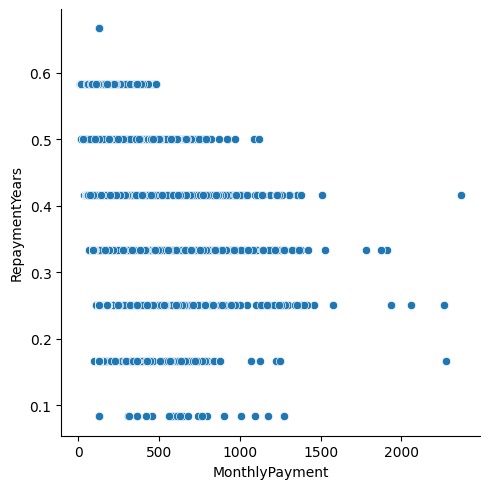

In [ ]:
sns.relplot(x="MonthlyPayment" , y="RepaymentYears" ,data=Reg_DF )

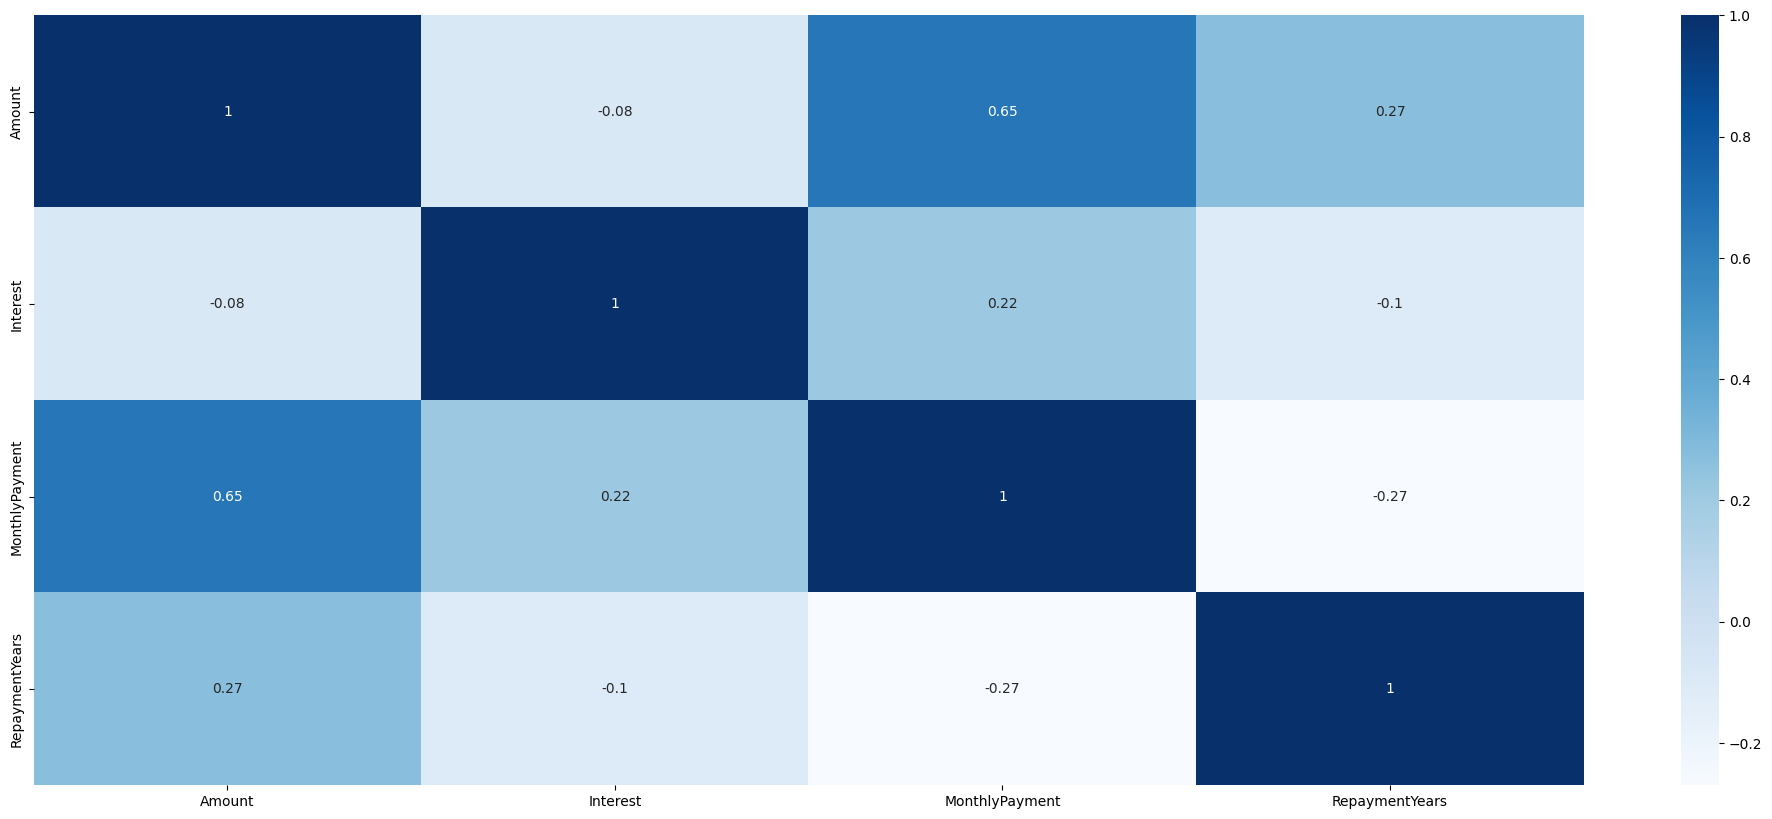

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap( Reg_DF.corr(), annot=True, cmap='Blues')

In [ ]:
Reg_DF_Full = df.drop(columns="Defaulted")
Reg_DF_Full = Reg_DF_Full[Reg_DF_Full["MonthlyPayment"] != 0].reset_index(drop=True)
Reg_DF_Full["RepaymentYears"] = Reg_DF["RepaymentYears"]
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408     30.00            12      130.393314   
1           191.7349   140.6057     25.00             1      130.393314   
2           319.5582   319.5409     25.00            20      130.393314   
3           127.8233    57.5205     45.00            15      130.393314   
4           319.5582   319.5436     30.00            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000     31.01            60      107.680000   
73900      3000.0000  3000.0000     18.25            60       85.330000   
73901      2500.0000  2500.0000     24.83            60       80.420000   
73902      3000.0000  3000.0000     17.74            60       84.510000   
73903      3000.0000  3000.0000     30.50            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

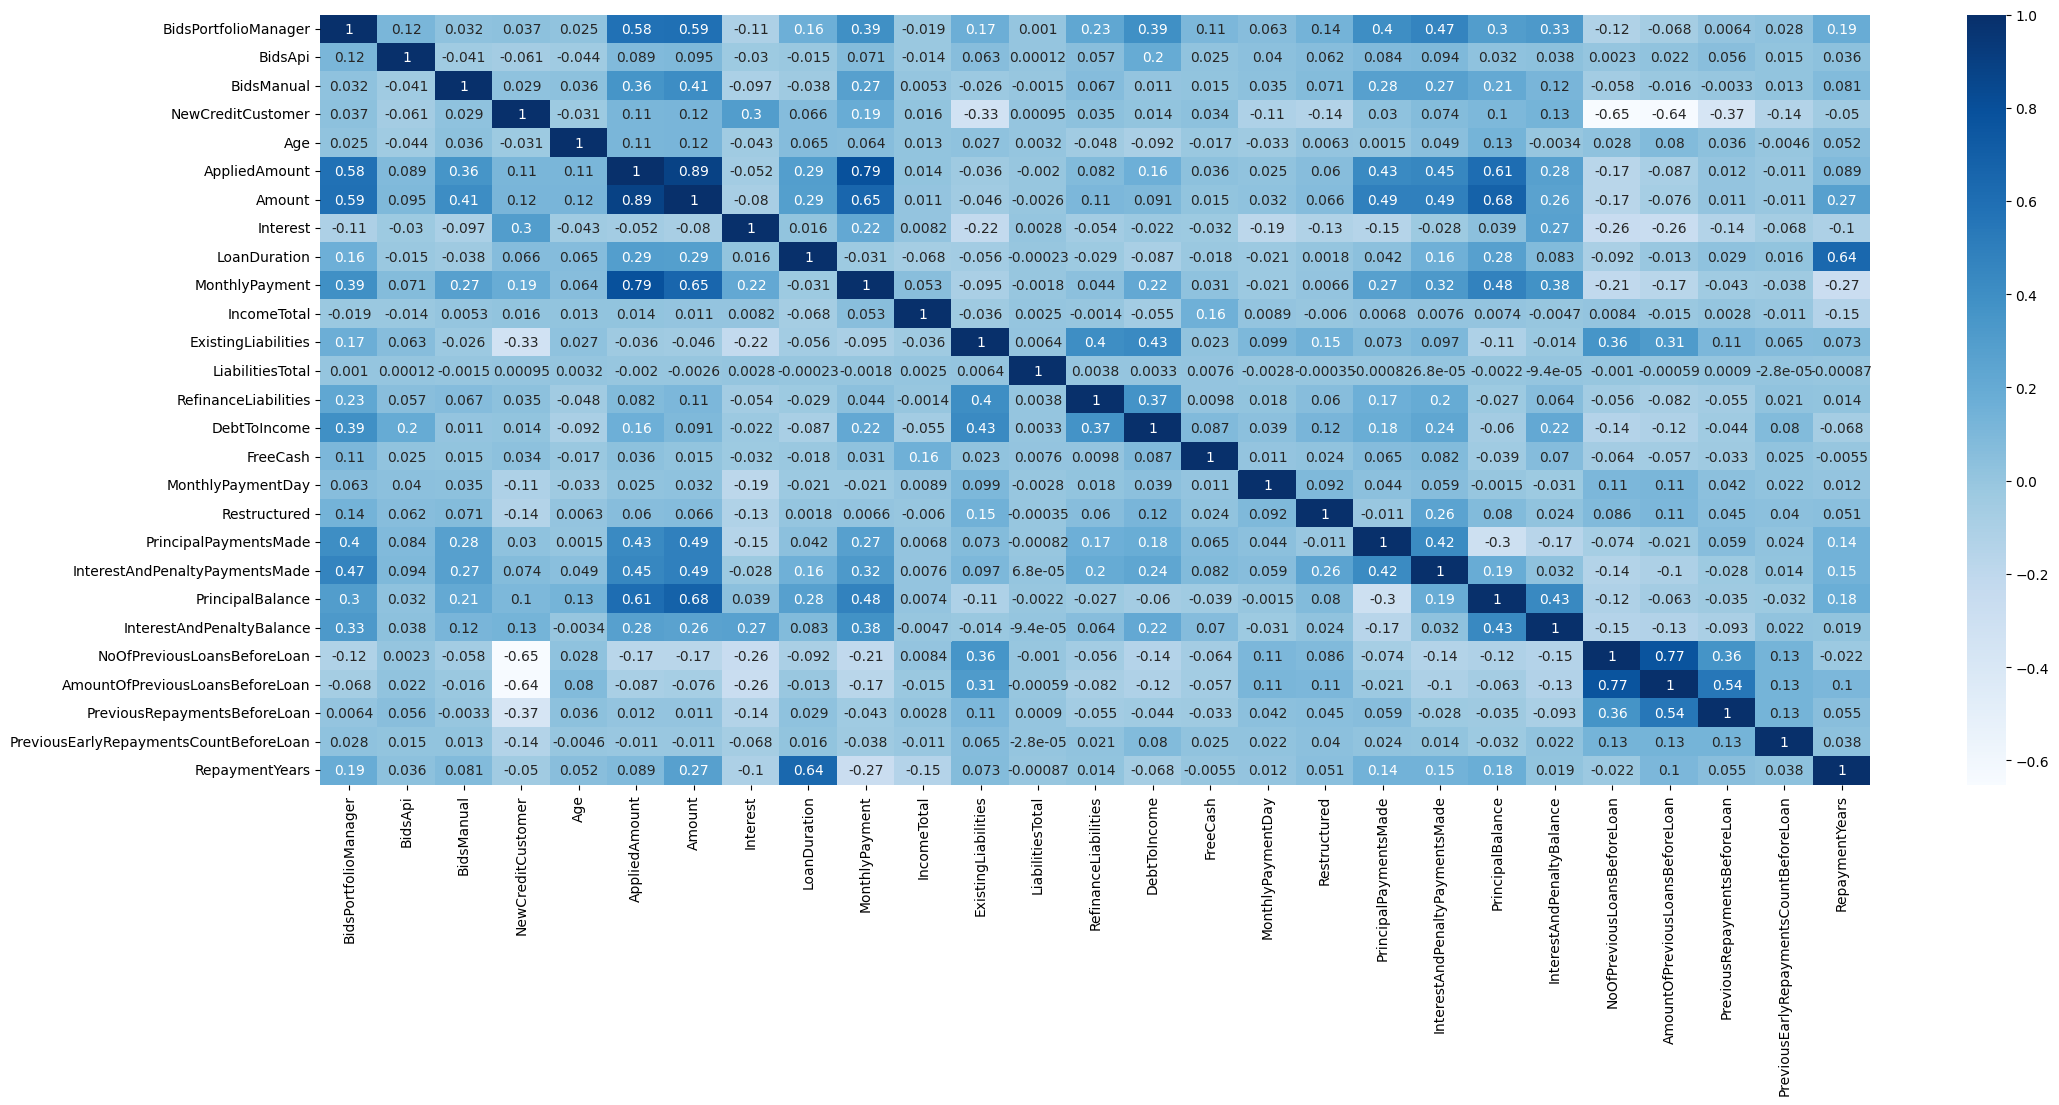

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap( Reg_DF_Full.corr(), annot=True, cmap='Blues')



---



# **Calculating EMI(Monthly Payment), ROI(Rate of Investment) using Formulas**

###**EMI**

In [ ]:
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408     30.00            12      130.393314   
1           191.7349   140.6057     25.00             1      130.393314   
2           319.5582   319.5409     25.00            20      130.393314   
3           127.8233    57.5205     45.00            15      130.393314   
4           319.5582   319.5436     30.00            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000     31.01            60      107.680000   
73900      3000.0000  3000.0000     18.25            60       85.330000   
73901      2500.0000  2500.0000     24.83            60       80.420000   
73902      3000.0000  3000.0000     17.74            60       84.510000   
73903      3000.0000  3000.0000     30.50            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

In [ ]:
Reg_DF_Full["Interest"] = Reg_DF_Full["Interest"] / 100

In [ ]:
Reg_DF_Full["LoanDuration"].value_counts(dropna=False)

60    32928
36    23620
48     5765
24     3469
12     3245
18     1837
6       920
9       811
3       612
30      333
1       174
2        42
5        32
4        27
10       20
20       15
8        13
15       12
7         9
16        7
22        2
14        2
11        1
19        1
21        1
13        1
17        1
42        1
27        1
52        1
38        1
Name: LoanDuration, dtype: int64

In [ ]:
Reg_DF_Full.dtypes

BidsPortfolioManager                         int64
BidsApi                                      int64
BidsManual                                 float64
NewCreditCustomer                             bool
VerificationType                          category
LanguageCode                              category
Age                                          int64
Gender                                    category
Country                                   category
AppliedAmount                              float64
Amount                                     float64
Interest                                   float64
LoanDuration                                 int64
MonthlyPayment                             float64
UseOfLoan                                 category
Education                                 category
MaritalStatus                             category
EmploymentStatus                          category
EmploymentDurationCurrentEmployer         category
OccupationArea                 

EMI = [P x R x (1+R)^N]/[(1+R)^N-1], where P stands for the loan amount or principal, R is the interest rate per month [if the interest rate per annum is 11%, then the rate of interest will be 11/(12 x 100)], and N is the number of monthly instalments. 

referenced from https://www.businesstoday.in/magazine/banking/story/how-to-calculate-emi-on-your-loans-formula-explanation-74916-2017-01-02

In [ ]:
Reg_DF_Full["EMI"] = (Reg_DF_Full["Amount"] * (Reg_DF_Full["Interest"]/12) * (1+(Reg_DF_Full["Interest"]/12))**Reg_DF_Full["LoanDuration"]) / (
    (1+(Reg_DF_Full["Interest"]/12))**Reg_DF_Full["LoanDuration"] - 1)

In [ ]:
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408    0.3000            12      130.393314   
1           191.7349   140.6057    0.2500             1      130.393314   
2           319.5582   319.5409    0.2500            20      130.393314   
3           127.8233    57.5205    0.4500            15      130.393314   
4           319.5582   319.5436    0.3000            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000    0.3101            60      107.680000   
73900      3000.0000  3000.0000    0.1825            60       85.330000   
73901      2500.0000  2500.0000    0.2483            60       80.420000   
73902      3000.0000  3000.0000    0.1774            60       84.510000   
73903      3000.0000  3000.0000    0.3050            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

In [ ]:
Reg_DF_Full["EMI"].describe()

count    73904.000000
mean       112.625924
std        102.812285
min          0.756816
25%         40.767093
50%         91.219153
75%        145.139532
max       3501.371672
Name: EMI, dtype: float64

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print(r2_score(Reg_DF_Full["MonthlyPayment"], Reg_DF_Full["EMI"]))

0.6187670943137925


In [ ]:
print("MSE : " ,mean_squared_error(Reg_DF_Full["MonthlyPayment"], Reg_DF_Full["EMI"]))
print("RMSE : " , mean_squared_error(Reg_DF_Full["MonthlyPayment"], Reg_DF_Full["EMI"])**0.5)

MSE :  5990.02448893955
RMSE :  77.39524849071518


### **Recreating Repayment Years with EMI**


In [ ]:
Reg_DF = Reg_DF_Full[["Amount","Interest","EMI"]]
Reg_DF

Amount  Interest         EMI
0       115.0408    0.3000   11.214997
1       140.6057    0.2500  143.534985
2       319.5409    0.2500   19.699580
3        57.5205    0.4500    5.083429
4       319.5436    0.3000   31.151388
...          ...       ...         ...
73899  3000.0000    0.3101   98.929540
73900  3000.0000    0.1825   76.588868
73901  2500.0000    0.2483   73.129355
73902  3000.0000    0.1774   75.756600
73903  3000.0000    0.3050   97.983562

[73904 rows x 3 columns]

In [ ]:
# Calculating Toal Loan Amount after Interest

Reg_DF["TotalAmount"] = Reg_DF["Amount"].values + ( (Reg_DF["Interest"].values) * Reg_DF["Amount"].values )
Reg_DF["TotalAmount"]

0         149.553040
1         175.757125
2         399.426125
3          83.404725
4         415.406680
            ...     
73899    3930.300000
73900    3547.500000
73901    3120.750000
73902    3532.200000
73903    3915.000000
Name: TotalAmount, Length: 73904, dtype: float64

In [ ]:
#Reg_DF = Reg_DF[Reg_DF["EMI"] != 0].reset_index(drop=True)

In [ ]:
Reg_DF[Reg_DF["EMI"] == 0]

Empty DataFrame
Columns: [Amount, Interest, EMI, TotalAmount]
Index: []

In [ ]:
Reg_DF = Reg_DF[Reg_DF["EMI"].notnull()].reset_index(drop=True)

In [ ]:
Reg_DF.isna().sum()

Amount         0
Interest       0
EMI            0
TotalAmount    0
dtype: int64

In [ ]:
Reg_DF

Amount  Interest         EMI  TotalAmount
0       115.0408    0.3000   11.214997   149.553040
1       140.6057    0.2500  143.534985   175.757125
2       319.5409    0.2500   19.699580   399.426125
3        57.5205    0.4500    5.083429    83.404725
4       319.5436    0.3000   31.151388   415.406680
...          ...       ...         ...          ...
73899  3000.0000    0.3101   98.929540  3930.300000
73900  3000.0000    0.1825   76.588868  3547.500000
73901  2500.0000    0.2483   73.129355  3120.750000
73902  3000.0000    0.1774   75.756600  3532.200000
73903  3000.0000    0.3050   97.983562  3915.000000

[73904 rows x 4 columns]

In [ ]:
# Calculating how much months to pay the loan then dividing by 12 to get the year

Months = []

Counter = 1

Reg_DF_Copy = Reg_DF[["TotalAmount","EMI"]]

for index, row in Reg_DF_Copy.iterrows():

    Current_EMI = row["EMI"]
    
    while( Current_EMI < row["TotalAmount"]):
      
      Counter = Counter + 1

      Current_EMI += Current_EMI
      
    Months.append(Counter/12)

    Counter = 1

In [ ]:
len(Months)

73904

In [ ]:
pd.Series(Months)

0        0.416667
1        0.166667
2        0.500000
3        0.500000
4        0.416667
           ...   
73899    0.583333
73900    0.583333
73901    0.583333
73902    0.583333
73903    0.583333
Length: 73904, dtype: float64

In [ ]:
Reg_DF["RepaymentYears"] = pd.Series(Months)

In [ ]:
Reg_DF["RepaymentYears"].max()

0.5833333333333334

In [ ]:
Reg_DF

Amount  Interest         EMI  TotalAmount  RepaymentYears
0       115.0408    0.3000   11.214997   149.553040        0.416667
1       140.6057    0.2500  143.534985   175.757125        0.166667
2       319.5409    0.2500   19.699580   399.426125        0.500000
3        57.5205    0.4500    5.083429    83.404725        0.500000
4       319.5436    0.3000   31.151388   415.406680        0.416667
...          ...       ...         ...          ...             ...
73899  3000.0000    0.3101   98.929540  3930.300000        0.583333
73900  3000.0000    0.1825   76.588868  3547.500000        0.583333
73901  2500.0000    0.2483   73.129355  3120.750000        0.583333
73902  3000.0000    0.1774   75.756600  3532.200000        0.583333
73903  3000.0000    0.3050   97.983562  3915.000000        0.583333

[73904 rows x 5 columns]

In [ ]:
(Reg_DF["RepaymentYears"]).value_counts()

0.500000    34866
0.583333    33124
0.416667     4179
0.333333     1024
0.250000      537
0.166667      174
Name: RepaymentYears, dtype: int64

In [ ]:
(Reg_DF["RepaymentYears"] * 12).value_counts()

6.0    34866
7.0    33124
5.0     4179
4.0     1024
3.0      537
2.0      174
Name: RepaymentYears, dtype: int64

In [ ]:
(Reg_DF_Full["LoanDuration"]).value_counts()

60    32928
36    23620
48     5765
24     3469
12     3245
18     1837
6       920
9       811
3       612
30      333
1       174
2        42
5        32
4        27
10       20
20       15
8        13
15       12
7         9
16        7
22        2
14        2
11        1
19        1
21        1
13        1
17        1
42        1
27        1
52        1
38        1
Name: LoanDuration, dtype: int64

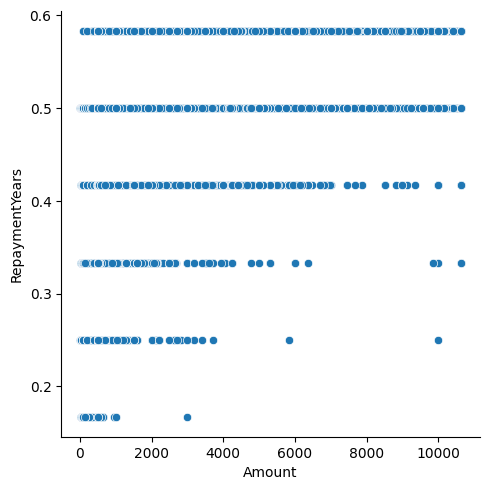

In [ ]:
# plt.figure(figsize=(25,10))

sns.relplot(x="Amount" , y="RepaymentYears" ,data=Reg_DF )

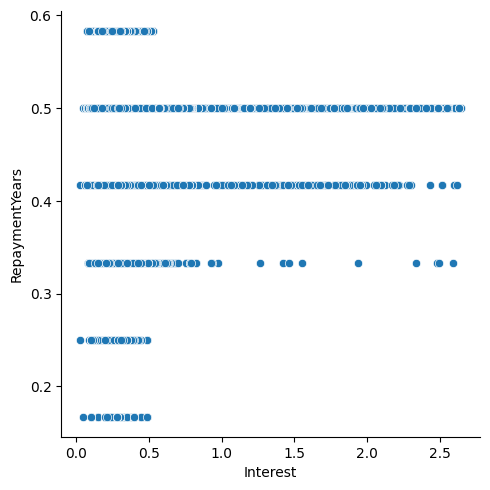

In [ ]:
sns.relplot(x="Interest" , y="RepaymentYears" ,data=Reg_DF )

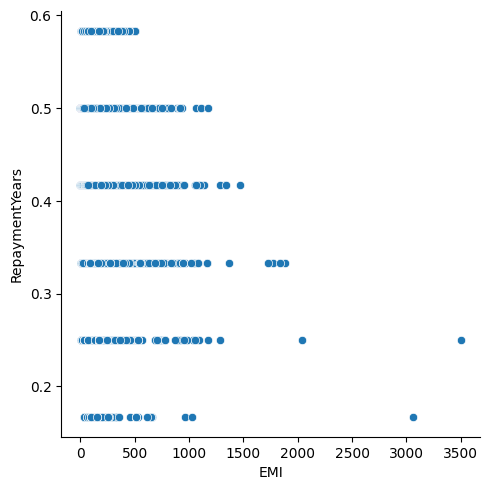

In [ ]:
sns.relplot(x="EMI" , y="RepaymentYears" ,data=Reg_DF )

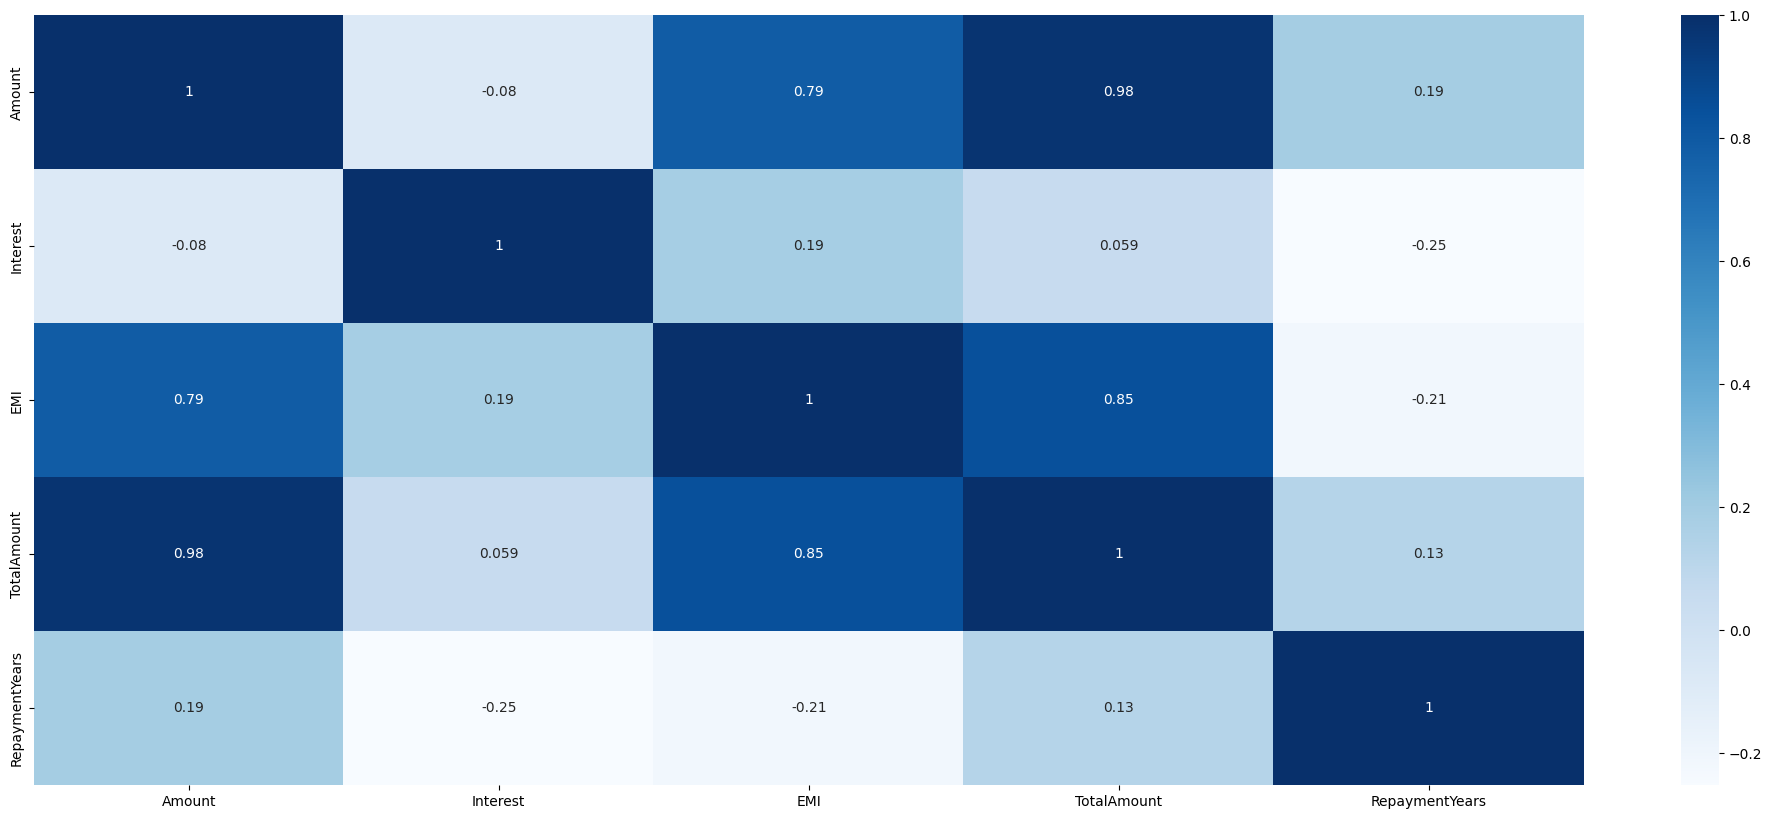

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap( Reg_DF.corr(), annot=True, cmap='Blues')

In [ ]:
Reg_DF_Full["RepaymentYears"] = Reg_DF["RepaymentYears"]
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408    0.3000            12      130.393314   
1           191.7349   140.6057    0.2500             1      130.393314   
2           319.5582   319.5409    0.2500            20      130.393314   
3           127.8233    57.5205    0.4500            15      130.393314   
4           319.5582   319.5436    0.3000            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000    0.3101            60      107.680000   
73900      3000.0000  3000.0000    0.1825            60       85.330000   
73901      2500.0000  2500.0000    0.2483            60       80.420000   
73902      3000.0000  3000.0000    0.1774            60       84.510000   
73903      3000.0000  3000.0000    0.3050            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

### **ROI**


In [ ]:
Reg_DF_Full.head()

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                     0        0    115.0410               True   
1                     0        0    140.6057              False   
2                     0        0    319.5580               True   
3                     0        0     57.5205               True   
4                     0        0    319.5582               True   

                    VerificationType LanguageCode  Age Gender  Country  \
0  Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1  Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2  Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3  Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4  Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   

   AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment  \
0       319.5582  115.0408      0.30            12      130.393314   
1       191.7349  140.6057      0.25             1      130.393314   
2       319.5582  319.5409      0.25            20      130.393314   
3       127.8233   57.5205      0.45            15      130.393314   
4       319.5582  319.5436      0.30            12      130.393314   

            UseOfLoan             Education MaritalStatus EmploymentStatus  \
0               Other  Vocational Education       Married   Fully Employed   
1               Other      Higher Education      Divorced   Fully Employed   
2    Home Improvement   Secondary Education       Married   Fully Employed   
3  Loan Consolidation       Basic Education        Single    Not Specified   
4             Vehicle   Secondary Education    Cohabitant   Fully Employed   

  EmploymentDurationCurrentEmployer        OccupationArea HomeOwnershipType  \
0                        UpTo3Years  Retail and Wholesale             Owner   
1                    MoreThan5Years             Education             Owner   
2                        UpTo4Years                Mining             Owner   
3                        UpTo2Years                 Other             Owner   
4                        UpTo2Years  Retail and Wholesale             Owner   

   IncomeTotal  ExistingLiabilities  LiabilitiesTotal  RefinanceLiabilities  \
0      10500.0                    0               0.0                     0   
1      10800.0                    0               0.0                     0   
2       7000.0                    0               0.0                     0   
3      11600.0                    0               0.0                     0   
4       6800.0                    0               0.0                     0   

   DebtToIncome  FreeCash  MonthlyPaymentDay Rating  Restructured  \
0           0.0       0.0                 25      F         False   
1           0.0       0.0                 15      F         False   
2           0.0       0.0                 25      F          True   
3           0.0       0.0                 15      F         False   
4           0.0       0.0                 25      F         False   

  CreditScoreEsMicroL  PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
0                   M               115.0408                         20.4222   
1                   M               140.6057                          2.0227   
2                   M               203.1909                         59.7626   
3                   M                57.5205                         18.7323   
4                   M               319.5436                        220.4200   

   PrincipalBalance  InterestAndPenaltyBalance  NoOfPreviousLoansBeforeLoan  \
0              0.00                       0.00                            1   
1              0.00                       0.00                            2   
2            116.35                     414.07                            0   
3              0.00                       0.00                            1   
4              0.00     

**ROI (%) = (Net Income/ Principal Amount) ×100**

**[Refrence](https://www.bartleby.com/subject/business/finance/concepts/calculating-the-return-on-a-loan)**

In [ ]:
Reg_DF

Amount  Interest         EMI  TotalAmount  RepaymentYears
0       115.0408    0.3000   11.214997   149.553040        0.416667
1       140.6057    0.2500  143.534985   175.757125        0.166667
2       319.5409    0.2500   19.699580   399.426125        0.500000
3        57.5205    0.4500    5.083429    83.404725        0.500000
4       319.5436    0.3000   31.151388   415.406680        0.416667
...          ...       ...         ...          ...             ...
73899  3000.0000    0.3101   98.929540  3930.300000        0.583333
73900  3000.0000    0.1825   76.588868  3547.500000        0.583333
73901  2500.0000    0.2483   73.129355  3120.750000        0.583333
73902  3000.0000    0.1774   75.756600  3532.200000        0.583333
73903  3000.0000    0.3050   97.983562  3915.000000        0.583333

[73904 rows x 5 columns]

In [ ]:
Reg_DF["InterestAmount"] =( Reg_DF["Interest"] * Reg_DF["Amount"])
Reg_DF

Amount  Interest         EMI  TotalAmount  RepaymentYears  \
0       115.0408    0.3000   11.214997   149.553040        0.416667   
1       140.6057    0.2500  143.534985   175.757125        0.166667   
2       319.5409    0.2500   19.699580   399.426125        0.500000   
3        57.5205    0.4500    5.083429    83.404725        0.500000   
4       319.5436    0.3000   31.151388   415.406680        0.416667   
...          ...       ...         ...          ...             ...   
73899  3000.0000    0.3101   98.929540  3930.300000        0.583333   
73900  3000.0000    0.1825   76.588868  3547.500000        0.583333   
73901  2500.0000    0.2483   73.129355  3120.750000        0.583333   
73902  3000.0000    0.1774   75.756600  3532.200000        0.583333   
73903  3000.0000    0.3050   97.983562  3915.000000        0.583333   

       InterestAmount  
0           34.512240  
1           35.151425  
2           79.885225  
3           25.884225  
4           95.863080  
...               ...  
73899      930.300000  
73900      547.500000  
73901      620.750000  
73902      532.200000  
73903      915.000000  

[73904 rows x 6 columns]

In [ ]:
Reg_DF_Full["ROI"] =  ( Reg_DF["InterestAmount"] / Reg_DF["TotalAmount"] ) * 100
Reg_DF_Full["ROI"]

0        23.076923
1        20.000000
2        20.000000
3        31.034483
4        23.076923
           ...    
73899    23.669949
73900    15.433404
73901    19.891052
73902    15.067097
73903    23.371648
Name: ROI, Length: 73904, dtype: float64

In [ ]:
Reg_DF_Full["ROI"].describe()

count    73904.000000
mean        26.642468
std         11.350549
min          2.912621
25%         18.850929
50%         24.505511
75%         34.214854
max         72.550850
Name: ROI, dtype: float64

In [ ]:
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408    0.3000            12      130.393314   
1           191.7349   140.6057    0.2500             1      130.393314   
2           319.5582   319.5409    0.2500            20      130.393314   
3           127.8233    57.5205    0.4500            15      130.393314   
4           319.5582   319.5436    0.3000            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000    0.3101            60      107.680000   
73900      3000.0000  3000.0000    0.1825            60       85.330000   
73901      2500.0000  2500.0000    0.2483            60       80.420000   
73902      3000.0000  3000.0000    0.1774            60       84.510000   
73903      3000.0000  3000.0000    0.3050            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

In [ ]:
Reg_DF_Full.dtypes

BidsPortfolioManager                         int64
BidsApi                                      int64
BidsManual                                 float64
NewCreditCustomer                             bool
VerificationType                          category
LanguageCode                              category
Age                                          int64
Gender                                    category
Country                                   category
AppliedAmount                              float64
Amount                                     float64
Interest                                   float64
LoanDuration                                 int64
MonthlyPayment                             float64
UseOfLoan                                 category
Education                                 category
MaritalStatus                             category
EmploymentStatus                          category
EmploymentDurationCurrentEmployer         category
OccupationArea                 

###**Saving Data**

In [ ]:
Mock_DF = df[df["MonthlyPayment"] != 0].reset_index(drop=True)
Mock_DF

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408     30.00            12      130.393314   
1           191.7349   140.6057     25.00             1      130.393314   
2           319.5582   319.5409     25.00            20      130.393314   
3           127.8233    57.5205     45.00            15      130.393314   
4           319.5582   319.5436     30.00            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000     31.01            60      107.680000   
73900      3000.0000  3000.0000     18.25            60       85.330000   
73901      2500.0000  2500.0000     24.83            60       80.420000   
73902      3000.0000  3000.0000     17.74            60       84.510000   
73903      3000.0000  3000.0000     30.50            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

In [ ]:
Reg_DF_Full["Defaulted"] = Mock_DF["Defaulted"]
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
3                         0        0     57.5205               True   
4                         0        0    319.5582               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
3      Unverified/Cross Referenced Phone     Estonian   23  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408    0.3000            12      130.393314   
1           191.7349   140.6057    0.2500             1      130.393314   
2           319.5582   319.5409    0.2500            20      130.393314   
3           127.8233    57.5205    0.4500            15      130.393314   
4           319.5582   319.5436    0.3000            12      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000    0.3101            60      107.680000   
73900      3000.0000  3000.0000    0.1825            60       85.330000   
73901      2500.0000  2500.0000    0.2483            60       80.420000   
73902      3000.0000  3000.0000    0.1774            60       84.510000   
73903      3000.0000  3000.0000    0.3050            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
3      Loan Consolidation       Basic Education        Single   
4                 Vehicle   Secondary Education    Cohabitant   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

      EmploymentStatus EmploymentDurationCurrentEmployer  \
0       Fully Employed                        UpTo3Years   
1       Fully Employed                    MoreThan5Years   
2       Fully Employed                        UpTo4Years   
3        Not Specified                        UpTo2Years   
4       Fully Employed                        UpTo2Years   
...                ...                               ...   
73899   Fully Employed                    MoreThan5Years   
73900   Fully Employed                    MoreThan5Year

In [ ]:
Reduced_Cols = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'LanguageCode', 'Age',
       'Interest', 'LoanDuration', 'Education',
       'MaritalStatus', 'EmploymentDurationCurrentEmployer',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'Rating', 'PreviousRepaymentsBeforeLoan',"Amount","RepaymentYears","ROI","EMI","Defaulted"]

reduced_df = Reg_DF_Full[Reduced_Cols]
reduced_df

BidsPortfolioManager  BidsApi  BidsManual LanguageCode  Age  Interest  \
0                         0        0    115.0410     Estonian   61    0.3000   
1                         0        0    140.6057     Estonian   48    0.2500   
2                         0        0    319.5580     Estonian   58    0.2500   
3                         0        0     57.5205     Estonian   23    0.4500   
4                         0        0    319.5582     Estonian   25    0.3000   
...                     ...      ...         ...          ...  ...       ...   
73899                  2515        0    485.0000      Finnish   37    0.3101   
73900                  1880        0   1120.0000      Finnish   35    0.1825   
73901                  1975        0    525.0000      Finnish   40    0.2483   
73902                  1840        0   1160.0000     Estonian   47    0.1774   
73903                  2990        0     10.0000     Estonian   21    0.3050   

       LoanDuration             Education MaritalStatus  \
0                12  Vocational Education       Married   
1                 1      Higher Education      Divorced   
2                20   Secondary Education       Married   
3                15       Basic Education        Single   
4                12   Secondary Education    Cohabitant   
...             ...                   ...           ...   
73899            60  Vocational Education        Single   
73900            60  Vocational Education        Single   
73901            60  Vocational Education       Married   
73902            60      Higher Education       Married   
73903            60   Secondary Education        Single   

      EmploymentDurationCurrentEmployer             HomeOwnershipType  \
0                            UpTo3Years                         Owner   
1                        MoreThan5Years                         Owner   
2                            UpTo4Years                         Owner   
3                            UpTo2Years                         Owner   
4                            UpTo2Years                         Owner   
...                                 ...                           ...   
73899                    MoreThan5Years                 Council House   
73900                    MoreThan5Years                         Owner   
73901                    MoreThan5Years                         Owner   
73902                    MoreThan5Years  Tenant, Unfurnished Property   
73903                        UpTo3Years           Living with Parents   

       IncomeTotal  ExistingLiabilities  LiabilitiesTotal  DebtToIncome  \
0          10500.0                    0              0.00          0.00   
1          10800.0                    0              0.00          0.00   
2           7000.0                    0              0.00          0.00   
3          11600.0                    0              0.00          0.00   
4           6800.0                    0              0.00          0.00   
...            ...                  ...               ...           ...   
73899       1400.0                    1            500.00          7.69   
73900       2265.0                    5           1777.46         31.58   
73901       2500.0                    2           1350.00          3.22   
73902        540.0                    8            732.05         44.35   
73903        500.0                    5            531.03         35.03   

       FreeCash  MonthlyPaymentDay Rating  PreviousRepaymentsBeforeLoan  \
0          0.00                 25      F                        0.0000   
1          0.00                 15      F                      258.6256   
2          0.00                 25      F                        0.0000   
3          0.00                 15      F                        0.0000   
4          0.00                 25      F                        0.0000   
...         ...                ...    ...                           ...   
73899    792.32                  1

In [ ]:
reduced_df.to_csv("/content/drive/MyDrive/Technocolabs/Bondora_Final.csv", index=False)

# **Removing Outliers**

In [ ]:
dtypes = pd.DataFrame(Reg_DF_Full.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=Reg_DF_Full.nunique().sort_values(ascending=True)

dtypes["Null Values"]=Reg_DF_Full.isnull().sum()

dtypes["% null Values"]=Reg_DF_Full.isnull().sum()/len(Reg_DF_Full)

dtypes.sort_values(by="Unique Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Reg_DF_Full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73904 entries, 0 to 73903
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   BidsPortfolioManager                    73904 non-null  int64   
 1   BidsApi                                 73904 non-null  int64   
 2   BidsManual                              73904 non-null  float64 
 3   NewCreditCustomer                       73904 non-null  bool    
 4   VerificationType                        73904 non-null  category
 5   LanguageCode                            73904 non-null  category
 6   Age                                     73904 non-null  int64   
 7   Gender                                  73904 non-null  category
 8   Country                                 73904 non-null  category
 9   AppliedAmount                           73904 non-null  float64 
 10  Amount                                  73904 

In [ ]:
Reg_DF_Full.describe()

BidsPortfolioManager       BidsApi    BidsManual           Age  \
count          73904.000000  73904.000000  73904.000000  73904.000000   
mean            1162.355312     34.313853    540.308158     39.688407   
std             1467.016327    167.215926    784.486776     12.214057   
min                0.000000      0.000000      0.000000      0.000000   
25%              240.000000      0.000000     26.000000     30.000000   
50%              577.000000      0.000000    280.000000     38.000000   
75%             1565.000000      6.000000    711.000000     48.000000   
max            10625.000000   7570.000000  10630.000000     77.000000   

       AppliedAmount        Amount      Interest  LoanDuration  \
count   73904.000000  73904.000000  73904.000000  73904.000000   
mean     2709.159196   2423.297085      0.408538     44.441762   
std      2458.443226   2138.611968      0.312053     16.433666   
min        31.955800     12.778900      0.030000      1.000000   
25%       740.000000    700.000000      0.232300     36.000000   
50%      2125.000000   2020.000000      0.324600     48.000000   
75%      3720.000000   3185.000000      0.520100     60.000000   
max     10632.000000  10632.000000      2.643100     60.000000   

       MonthlyPayment   IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
count    73904.000000  7.390400e+04         73904.000000      7.390400e+04   
mean       136.550933  1.894096e+03             3.235914      7.155684e+02   
std        125.349339  6.330991e+03             3.407826      4.563197e+04   
min         12.490000  0.000000e+00             0.000000      0.000000e+00   
25%         52.060000  9.000000e+02             1.000000      1.000000e+02   
50%        115.840000  1.300000e+03             2.000000      3.750000e+02   
75%        169.310000  2.000000e+03             5.000000      7.259000e+02   
max       2368.540000  1.012019e+06            36.000000      1.240000e+07   

       RefinanceLiabilities  DebtToIncome       FreeCash  MonthlyPaymentDay  \
count          73904.000000  73904.000000   73904.000000       73904.000000   
mean               0.230786     11.457649     177.403072          11.326126   
std                0.924989     18.855534     858.731279           7.357694   
min                0.000000      0.000000   -2332.000000           0.000000   
25%                0.000000      0.000000       0.000000           5.000000   
50%                0.000000      0.000000       0.000000          10.000000   
75%                0.000000     18.920000     210.110000          16.000000   
max               16.000000    198.020000  158748.640000          28.000000   

       PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
count           73904.000000                    73904.000000   
mean             1038.635616                      465.163610   
std              1616.284245                      751.371987   
min                 0.000000                        0.000000   
25%                57.690000                       35.580000   
50%               427.225000                      180.300000   
75%              1312.610000                      575.662500   
max             10632.000000                    14507.240000   

       PrincipalBalance  InterestAndPenaltyBalance  \
count      73904.000000               73904.000000   
mean        1363.561620                 957.735689   
std         1944.265116                2350.214781   
min          -34.200000                  -2.510000   
25%            0.000000                   0.000000   
50%          511.540000                  75.870000   
75%         2111.730000                 941.395000   
max        10632.000000               54638.910000   

       NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
count                 73904.000000                     73904.000000   
mean                      1.181235                      2252.071046   
std                       2.053809                      3950.9

In [ ]:
Numeric_Cols = [ col for col in Reg_DF_Full if Reg_DF_Full[col].dtype in ["int64","float64"]]
print(len(Numeric_Cols))

Numeric_Cols

28


['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'Age',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'RepaymentYears',
 'EMI',
 'ROI',
 'Defaulted']

**Removing Outliers with Percentile**

In [ ]:
X = Reg_DF_Full.copy()


for col in X[Numeric_Cols]:
  low, high = X[col].quantile([0.001, 0.995])
  mask = X[col].between(low, high)
  X = X[mask]
  
X.describe()

BidsPortfolioManager       BidsApi    BidsManual           Age  \
count          65809.000000  65809.000000  65809.000000  65809.000000   
mean            1062.392302     24.812214    507.499256     39.568053   
std             1227.329120     89.118033    651.055396     12.101412   
min                0.000000      0.000000      0.000000     18.000000   
25%              243.000000      0.000000     30.000000     30.000000   
50%              560.000000      0.000000    281.211100     38.000000   
75%             1494.000000      5.000000    700.000000     48.000000   
max             9061.000000   1000.000000   4568.000000     69.000000   

       AppliedAmount       Amount      Interest  LoanDuration  MonthlyPayment  \
count   65809.000000  65809.00000  65809.000000  65809.000000    65809.000000   
mean     2497.629841   2226.78836      0.392587     44.692960      122.634905   
std      2138.241902   1766.40859      0.252827     16.194688       94.475856   
min        63.911600     51.12930      0.086400      1.000000       13.120000   
25%       740.000000    700.00000      0.232300     36.000000       49.490000   
50%      2125.000000   2020.00000      0.324600     48.000000      113.040000   
75%      3190.000000   3185.00000      0.513900     60.000000      155.620000   
max     10630.000000  10630.00000      1.915200     60.000000      690.860000   

        IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
count  65809.000000         65809.000000      65809.000000   
mean    1627.882827             3.059885        480.135663   
std     1574.391737             2.981325        495.031952   
min      200.000000             0.000000          0.000000   
25%      873.000000             1.000000        100.000000   
50%     1275.000000             2.000000        358.590000   
75%     1909.000000             4.000000        682.650000   
max    18800.000000            18.000000       3235.180000   

       RefinanceLiabilities  DebtToIncome      FreeCash  MonthlyPaymentDay  \
count          65809.000000  65809.000000  65809.000000       65809.000000   
mean               0.175250     10.602026    159.732375          11.261195   
std                0.699043     17.866858    308.981461           7.278136   
min                0.000000      0.000000      0.000000           1.000000   
25%                0.000000      0.000000      0.000000           5.000000   
50%                0.000000      0.000000      0.000000          10.000000   
75%                0.000000     17.180000    202.220000          15.000000   
max                6.000000     69.640000   1787.870000          27.000000   

       PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
count           65809.000000                    65809.000000   
mean              939.854890                      414.049113   
std              1339.931681                      581.508710   
min                 0.000000                        0.000000   
25%                58.780000                       39.230000   
50%               416.950000                      180.120000   
75%              1235.910000                      545.330000   
max              9460.000000                     3884.110000   

       PrincipalBalance  InterestAndPenaltyBalance  \
count      65809.000000               65809.000000   
mean        1268.217062                 746.864223   
std         1702.069173                1496.090126   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%          510.560000                  74.810000   
75%         2100.230000                 812.540000   
max        10463.980000               12476.040000   

       NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
count                 65809.000000                     65809.000000   
mean                      1.092753                      2105.127470   
std                       1.751375                      3462.237047   
min      

In [ ]:
X

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
4                         0        0    319.5582               True   
5                         0        0    300.3845               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
5      Unverified/Cross Referenced Phone     Estonian   22   Male  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408    0.3000            12      130.393314   
1           191.7349   140.6057    0.2500             1      130.393314   
2           319.5582   319.5409    0.2500            20      130.393314   
4           319.5582   319.5436    0.3000            12      130.393314   
5           300.3847   300.4314    0.3000            24      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000    0.3101            60      107.680000   
73900      3000.0000  3000.0000    0.1825            60       85.330000   
73901      2500.0000  2500.0000    0.2483            60       80.420000   
73902      3000.0000  3000.0000    0.1774            60       84.510000   
73903      3000.0000  3000.0000    0.3050            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
4                 Vehicle   Secondary Education    Cohabitant   
5                   Other   Secondary Education        Single   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

         EmploymentStatus EmploymentDurationCurrentEmployer  \
0          Fully Employed                        UpTo3Years   
1          Fully Employed                    MoreThan5Years   
2          Fully Employed                        UpTo4Years   
4          Fully Employed                        UpTo2Years   
5      Partially Employed                        UpTo2Years   
...                   ...                               ...   
73899      Fully Employed                    MoreThan5Years   
73900      Fully Employed      

In [ ]:
Reg_DF_Full = X
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410               True   
1                         0        0    140.6057              False   
2                         0        0    319.5580               True   
4                         0        0    319.5582               True   
5                         0        0    300.3845               True   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000               True   
73900                  1880        0   1120.0000              False   
73901                  1975        0    525.0000               True   
73902                  1840        0   1160.0000              False   
73903                  2990        0     10.0000              False   

                        VerificationType LanguageCode  Age Gender  Country  \
0      Unverified/Cross Referenced Phone     Estonian   61  Woman  Estonia   
1      Unverified/Cross Referenced Phone     Estonian   48  Woman  Estonia   
2      Unverified/Cross Referenced Phone     Estonian   58  Woman  Estonia   
4      Unverified/Cross Referenced Phone     Estonian   25  Woman  Estonia   
5      Unverified/Cross Referenced Phone     Estonian   22   Male  Estonia   
...                                  ...          ...  ...    ...      ...   
73899                    Income Verified      Finnish   37   Male  Finland   
73900                    Income Verified      Finnish   35   Male  Finland   
73901                  Income Unverified      Finnish   40   Male  Finland   
73902           Income Expenses Verified     Estonian   47  Woman  Estonia   
73903           Income Expenses Verified     Estonian   21  Woman  Estonia   

       AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0           319.5582   115.0408    0.3000            12      130.393314   
1           191.7349   140.6057    0.2500             1      130.393314   
2           319.5582   319.5409    0.2500            20      130.393314   
4           319.5582   319.5436    0.3000            12      130.393314   
5           300.3847   300.4314    0.3000            24      130.393314   
...              ...        ...       ...           ...             ...   
73899      3000.0000  3000.0000    0.3101            60      107.680000   
73900      3000.0000  3000.0000    0.1825            60       85.330000   
73901      2500.0000  2500.0000    0.2483            60       80.420000   
73902      3000.0000  3000.0000    0.1774            60       84.510000   
73903      3000.0000  3000.0000    0.3050            60      106.740000   

                UseOfLoan             Education MaritalStatus  \
0                   Other  Vocational Education       Married   
1                   Other      Higher Education      Divorced   
2        Home Improvement   Secondary Education       Married   
4                 Vehicle   Secondary Education    Cohabitant   
5                   Other   Secondary Education        Single   
...                   ...                   ...           ...   
73899  Loan Consolidation  Vocational Education        Single   
73900    Home Improvement  Vocational Education        Single   
73901  Loan Consolidation  Vocational Education       Married   
73902               Other      Higher Education       Married   
73903  Loan Consolidation   Secondary Education        Single   

         EmploymentStatus EmploymentDurationCurrentEmployer  \
0          Fully Employed                        UpTo3Years   
1          Fully Employed                    MoreThan5Years   
2          Fully Employed                        UpTo4Years   
4          Fully Employed                        UpTo2Years   
5      Partially Employed                        UpTo2Years   
...                   ...                               ...   
73899      Fully Employed                    MoreThan5Years   
73900      Fully Employed      



---



# **Encoding Categorcial Features with Label Encoding**

In [ ]:
Reg_DF_Full.dtypes

BidsPortfolioManager                         int64
BidsApi                                      int64
BidsManual                                 float64
NewCreditCustomer                             bool
VerificationType                          category
LanguageCode                              category
Age                                          int64
Gender                                    category
Country                                   category
AppliedAmount                              float64
Amount                                     float64
Interest                                   float64
LoanDuration                                 int64
MonthlyPayment                             float64
UseOfLoan                                 category
Education                                 category
MaritalStatus                             category
EmploymentStatus                          category
EmploymentDurationCurrentEmployer         category
OccupationArea                 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categoricals
for colname in Reg_DF_Full.select_dtypes(["object","category","bool"]):
    Reg_DF_Full[colname], _ = Reg_DF_Full[colname].factorize()

In [ ]:
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410                  0   
1                         0        0    140.6057                  1   
2                         0        0    319.5580                  0   
4                         0        0    319.5582                  0   
5                         0        0    300.3845                  0   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000                  0   
73900                  1880        0   1120.0000                  1   
73901                  1975        0    525.0000                  0   
73902                  1840        0   1160.0000                  1   
73903                  2990        0     10.0000                  1   

       VerificationType  LanguageCode  Age  Gender  Country  AppliedAmount  \
0                     0             0   61       0        0       319.5582   
1                     0             0   48       0        0       191.7349   
2                     0             0   58       0        0       319.5582   
4                     0             0   25       0        0       319.5582   
5                     0             0   22       1        0       300.3847   
...                 ...           ...  ...     ...      ...            ...   
73899                 3             3   37       1        1      3000.0000   
73900                 3             3   35       1        1      3000.0000   
73901                 2             3   40       1        1      2500.0000   
73902                 1             0   47       0        0      3000.0000   
73903                 1             0   21       0        0      3000.0000   

          Amount  Interest  LoanDuration  MonthlyPayment  UseOfLoan  \
0       115.0408    0.3000            12      130.393314          0   
1       140.6057    0.2500             1      130.393314          0   
2       319.5409    0.2500            20      130.393314          1   
4       319.5436    0.3000            12      130.393314          2   
5       300.4314    0.3000            24      130.393314          0   
...          ...       ...           ...             ...        ...   
73899  3000.0000    0.3101            60      107.680000          3   
73900  3000.0000    0.1825            60       85.330000          1   
73901  2500.0000    0.2483            60       80.420000          3   
73902  3000.0000    0.1774            60       84.510000          0   
73903  3000.0000    0.3050            60      106.740000          3   

       Education  MaritalStatus  EmploymentStatus  \
0              0              0                 0   
1              1              1                 0   
2              2              0                 0   
4              2              2                 0   
5              2              3                 1   
...          ...            ...               ...   
73899          0              3                 0   
73900          0              3                 0   
73901          0              0                 3   
73902          1              0                 0   
73903          2              3                 0   

       EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                                      0               0                  0   
1                                      1               1                  0   
2                                      2               2                  0   
4                                      3               0                  0   
5                                      3               3                  0   
...                                  ...             ...                ...   
73899                                  1               4                  4   
73900                                  1              12                  0   
73901           

In [ ]:
Reg_DF_Full.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                           int64
VerificationType                            int64
LanguageCode                                int64
Age                                         int64
Gender                                      int64
Country                                     int64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                   int64
MaritalStatus                               int64
EmploymentStatus                            int64
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int64




---



# **Making Pipelines with Linear Regression**

In [ ]:
Reg_DF_Full = Reg_DF_Full.drop("MonthlyPayment",1)

In [ ]:
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410                  0   
1                         0        0    140.6057                  1   
2                         0        0    319.5580                  0   
4                         0        0    319.5582                  0   
5                         0        0    300.3845                  0   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000                  0   
73900                  1880        0   1120.0000                  1   
73901                  1975        0    525.0000                  0   
73902                  1840        0   1160.0000                  1   
73903                  2990        0     10.0000                  1   

       VerificationType  LanguageCode  Age  Gender  Country  AppliedAmount  \
0                     0             0   61       0        0       319.5582   
1                     0             0   48       0        0       191.7349   
2                     0             0   58       0        0       319.5582   
4                     0             0   25       0        0       319.5582   
5                     0             0   22       1        0       300.3847   
...                 ...           ...  ...     ...      ...            ...   
73899                 3             3   37       1        1      3000.0000   
73900                 3             3   35       1        1      3000.0000   
73901                 2             3   40       1        1      2500.0000   
73902                 1             0   47       0        0      3000.0000   
73903                 1             0   21       0        0      3000.0000   

          Amount  Interest  LoanDuration  UseOfLoan  Education  MaritalStatus  \
0       115.0408    0.3000            12          0          0              0   
1       140.6057    0.2500             1          0          1              1   
2       319.5409    0.2500            20          1          2              0   
4       319.5436    0.3000            12          2          2              2   
5       300.4314    0.3000            24          0          2              3   
...          ...       ...           ...        ...        ...            ...   
73899  3000.0000    0.3101            60          3          0              3   
73900  3000.0000    0.1825            60          1          0              3   
73901  2500.0000    0.2483            60          3          0              0   
73902  3000.0000    0.1774            60          0          1              0   
73903  3000.0000    0.3050            60          3          2              3   

       EmploymentStatus  EmploymentDurationCurrentEmployer  OccupationArea  \
0                     0                                  0               0   
1                     0                                  1               1   
2                     0                                  2               2   
4                     0                                  3               0   
5                     1                                  3               3   
...                 ...                                ...             ...   
73899                 0                                  1               4   
73900                 0                                  1              12   
73901                 3                                  1               5   
73902                 0                                  1               7   
73903                 0                                  0              11   

       HomeOwnershipType  IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
0                      0      10500.0                    0              0.00   
1                      0      10800.0                    0              0.00   
2                      0       7000.0                    0         

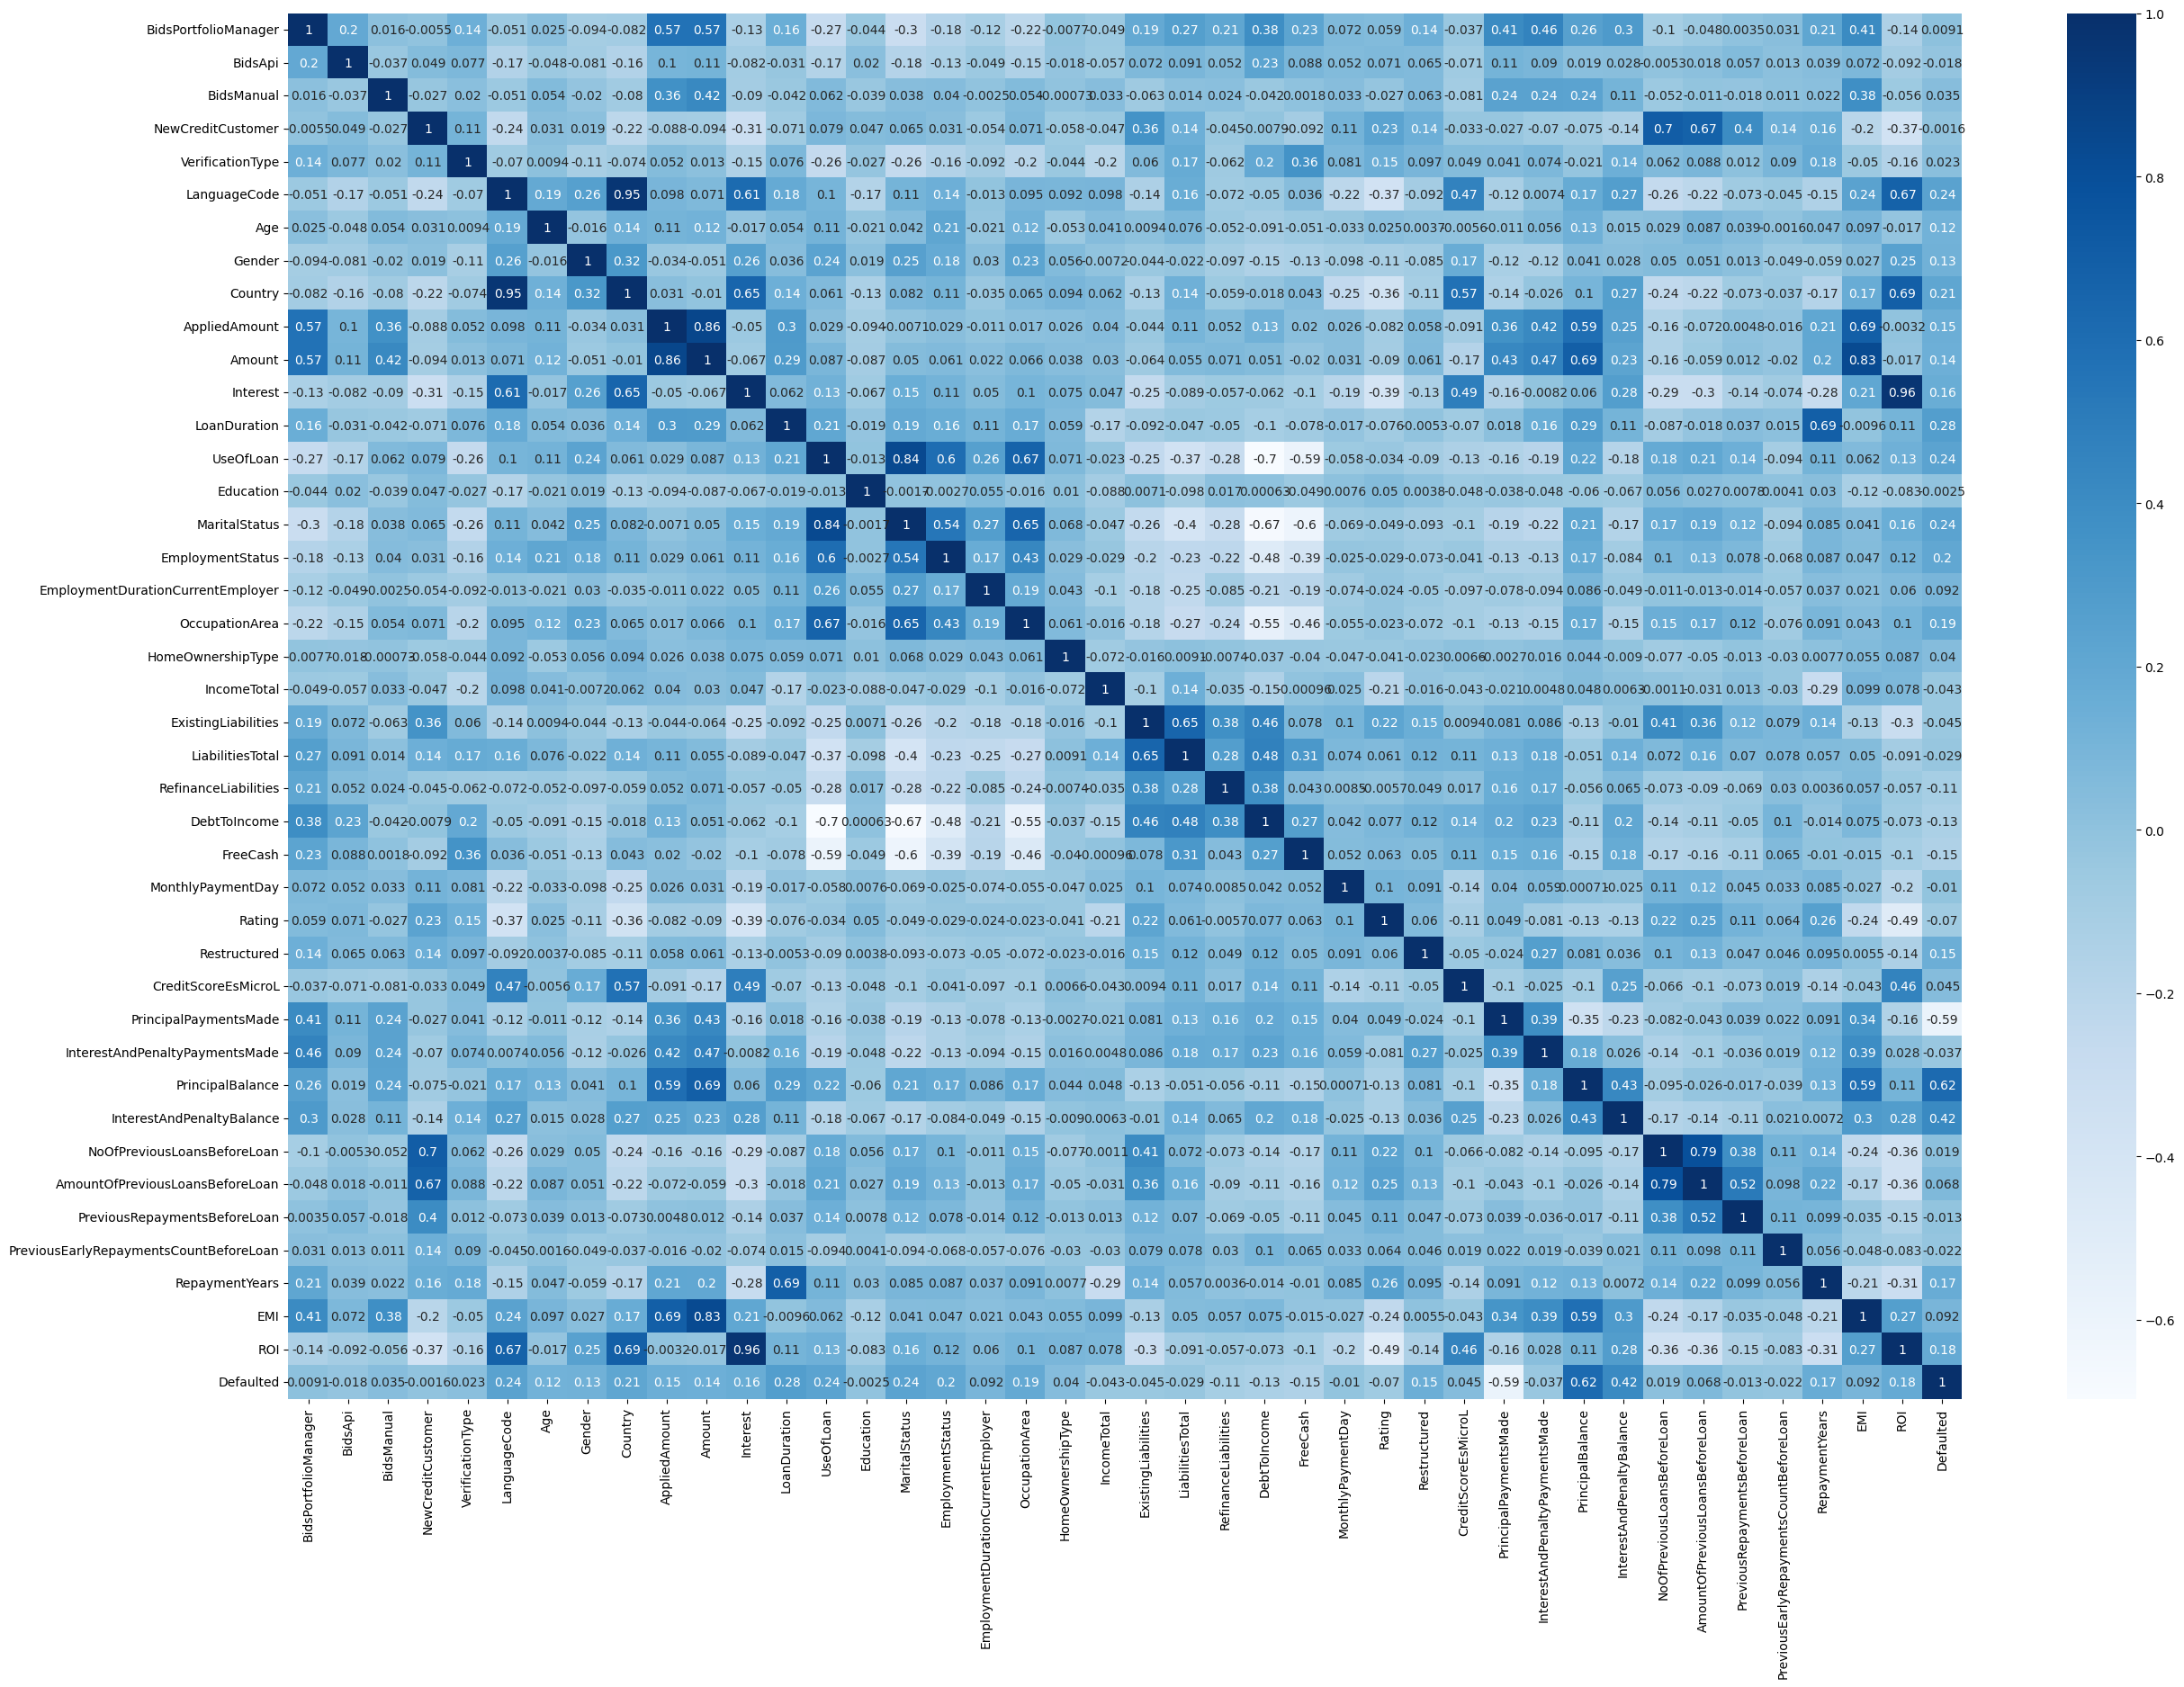

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap( Reg_DF_Full.corr(), annot=True, cmap='Blues')

## **With All Features**

### **Predicting Repayment Years**

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
])

In [ ]:
X = Reg_DF_Full.drop(columns=["EMI","ROI"]).copy()
y = X.pop("RepaymentYears")


X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0                 -1.030708 -0.593521   -0.260570           1.271764   
1                 -1.237991  0.620208   -0.225605          -0.786309   
2                 -0.387472 -0.593521   -0.947637          -0.786309   
3                 -0.665098 -0.593521   -0.497752          -0.786309   
4                  1.949456 -0.593521    0.410093          -0.786309   
...                     ...       ...         ...                ...   
49351             -1.459562 -0.593521   -0.518137          -0.786309   
49352              0.836884  1.738151    0.446426          -0.786309   
49353              0.066982  0.620208    1.618675           1.271764   
49354              1.806703 -0.593521    0.540006          -0.786309   
49355              0.639796 -0.593521    1.058946          -0.786309   

       VerificationType  LanguageCode       Age    Gender   Country  \
0              0.788388     -1.043350 -1.427227  0.297836 -0.922139   
1             -0.747210      1.294364 -0.277525  0.297836  1.438798   
2             -0.747210      1.294364  1.358605  0.297836  1.438798   
3             -0.747210      1.294364  0.249822  2.345704  1.438798   
4              0.788388      0.791212  0.910169 -1.422207  0.662063   
...                 ...           ...       ...       ...       ...   
49351         -3.086048     -1.043350 -0.985535 -1.422207 -0.922139   
49352         -0.747210     -1.043350  0.558297  0.297836 -0.922139   
49353          0.788388      0.791212  1.107730  0.297836  0.662063   
49354          1.760993      0.791212 -0.985535  0.297836  0.662063   
49355         -0.747210      0.791212  0.702889  0.297836  0.662063   

       AppliedAmount    Amount  Interest  LoanDuration  UseOfLoan  Education  \
0          -1.260285 -1.256106 -1.449178     -0.717082   0.769012  -0.375336   
1           0.127010  0.242142  1.044472      1.025584   0.769012  -0.375336   
2          -1.260285 -1.256106  2.530602     -0.717082   0.769012   0.523511   
3           0.127010  0.242142  1.044472      1.025584   0.769012   0.523511   
4           1.391974  1.587861 -0.641073     -0.717082  -1.416314  -0.375336   
...              ...       ...       ...           ...        ...        ...   
49351      -1.619484 -1.716625 -0.193271     -1.471547  -1.325990  -0.375336   
49352       0.438172  0.563197 -1.564990      1.025584   0.769012   0.523511   
49353       1.157168  1.327929  0.139271     -0.717082   0.769012  -0.375336   
49354       1.186194  1.359768 -0.368680      1.025584  -1.325990  -1.433045   
49355       1.322525  1.510411  1.098474      1.025584   0.769012  -1.433045   

       MaritalStatus  EmploymentStatus  EmploymentDurationCurrentEmployer  \
0           0.776932          0.481957                           1.639970   
1           0.776932          0.481957                          -0.938775   
2           0.776932          0.481957                          -0.938775   
3           0.776932          0.481957                           0.990529   
4          -0.943323          2.343072                          -0.938775   
...              ...               ...                                ...   
49351      -1.598886         -1.298548                          -1.606557   
49352       0.776932          0.481957                          -0.938775   
49353       0.776932          0.481957                           0.990529   
49354      -1.253538         -1.298548                           0.179706   
49355       0.776932          0.481957                           0.613735   

       OccupationArea  HomeOwnershipType  IncomeTotal  ExistingLiabilities  \
0            0.490311          -1.197482    -1.918418             0.920859   
1            0.490311           0.485141     0.124739            -1.424996   
2            0.490311           2.002720    -0.300249            -1.424996   
3            0.490311           0.042235    -0.300249            -0.150329   
4            

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", LinearRegression() ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.633267764376183

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

pd.DataFrame(X_test, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0                 -1.260617 -0.163779    0.037302           1.271764   
1                 -0.387472 -0.443237   -0.952165          -0.786309   
2                  1.578578 -0.593521    1.054635          -0.786309   
3                 -0.538828 -0.593521    1.200902          -0.786309   
4                  1.642717  1.027925   -0.088052           1.271764   
...                     ...       ...         ...                ...   
16448             -0.250329  2.264807    0.283294           1.271764   
16449              0.681659 -0.593521    1.086363          -0.786309   
16450              0.806604  0.424152   -0.455319          -0.786309   
16451             -1.148790 -0.034056    1.305990          -0.786309   
16452              1.218897  0.877959    1.419740          -0.786309   

       VerificationType  LanguageCode       Age    Gender   Country  \
0              0.788388     -1.043350  0.483787  0.297836 -0.922139   
1             -0.747210     -1.043350  0.249822  0.297836 -0.922139   
2             -0.747210      0.791212  1.882179  0.297836  0.662063   
3             -0.747210      1.294364  0.249822  0.297836  1.438798   
4              1.760993      0.791212 -0.003469  0.297836  0.662063   
...                 ...           ...       ...       ...       ...   
16448         -0.747210     -1.043350 -1.093613  0.297836 -0.922139   
16449          1.760993      0.791212  1.538795  0.297836  0.662063   
16450         -0.747210      0.791212  1.107730 -1.422207  0.662063   
16451          0.788388     -0.367028  0.910169  0.297836 -0.922139   
16452          0.788388      0.791212 -0.003469  0.297836  0.662063   

       AppliedAmount    Amount  Interest  LoanDuration  UseOfLoan  Education  \
0          -1.260285 -1.256106 -0.601853     -1.678435   0.769012  -1.433045   
1          -1.260285 -1.256106 -0.092609     -0.717082   0.769012  -1.433045   
2           0.985496  1.141246 -0.817619      1.025584  -1.416314   0.523511   
3           0.127667  0.242828  1.406280      1.025584   0.769012  -0.375336   
4           1.597557  1.022401 -0.212138      1.025584  -1.492890   1.286193   
...              ...       ...       ...           ...        ...        ...   
16448      -0.436458 -0.358032  0.082674      1.025584   0.769012   0.523511   
16449       0.687399  0.262562  0.474557      1.025584  -1.082600  -1.433045   
16450      -0.262660 -0.170913 -1.685702     -0.717082   0.769012  -1.433045   
16451      -0.527770 -0.456805 -0.601853     -1.678435   0.769012  -0.375336   
16452       1.157168  1.327929 -0.247488      0.002016   0.769012  -0.375336   

       MaritalStatus  EmploymentStatus  EmploymentDurationCurrentEmployer  \
0           0.776932          0.481957                           0.990529   
1           0.776932          0.481957                           0.613735   
2          -1.454755          3.290829                          -1.606557   
3           0.776932          0.481957                           0.990529   
4          -1.598886         -1.298548                          -0.339443   
...              ...               ...                                ...   
16448       0.776932          0.481957                          -1.606557   
16449      -0.943323         -1.298548                          -0.938775   
16450       0.776932          0.481957                          -0.938775   
16451       0.776932          0.481957                          -0.938775   
16452       0.776932          0.481957                           0.613735   

       OccupationArea  HomeOwnershipType  IncomeTotal  ExistingLiabilities  \
0            0.490311          -1.197482    -0.689277            -0.728228   
1            0.490311           0.042235    -1.335720            -0.150329   
2            1.589544          -1.197482     1.140264             0.307081   
3            0.490311           1.128268     0.655104            -0.728228   
4            

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.6255150149445028

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.6255150149445028


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  0.0013244927595844366
RMSE :  0.03639358129649288


In [ ]:
results = list(zip(X, Modeling_Pipeline["Model"].coef_))

importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
importance.sort_values(by="Coefficient" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([0.46211064, 0.50254497, 0.58207872, ..., 0.54491619, 0.47355161,
       0.55816751])

### **Predicting EMI(Monthly Payment)**

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    # ("Transformer", PowerTransformer() ),
])

In [ ]:
X = Reg_DF_Full.drop(columns=["RepaymentYears","ROI"]).copy()
y = X.pop("EMI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", LinearRegression() ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.863261064065757

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.8684866102608827

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.8684866102608827


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  768.7531235373633
RMSE :  27.726397593942192


In [ ]:
results = list(zip(X, Modeling_Pipeline["Model"].coef_))

importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
importance.sort_values(by="Coefficient" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([ 19.66162124, 141.03218622,  63.56588154, ..., 133.0803075 ,
        81.26618194,  56.26773346])

### **Predicting ROI**

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    # ("Transformer", PowerTransformer() ),
])

In [ ]:
X = Reg_DF_Full.drop(columns=["RepaymentYears","EMI"]).copy()
y = X.pop("ROI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", LinearRegression() ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.9544042848623033

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.9545042537983064

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.9545042537983064


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  4.9884861221088
RMSE :  2.233491912255068


In [ ]:
results = list(zip(X, Modeling_Pipeline["Model"].coef_))

importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
importance.sort_values(by="Coefficient" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([12.15682288, 17.15857185, 24.75958958, ..., 59.38585747,
       21.03591887, 31.43821039])

##**With Reduced Features**

In [ ]:
Reduced_Cols = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'LanguageCode', 'Age',
       'Interest', 'LoanDuration', 'Education',
       'MaritalStatus', 'EmploymentDurationCurrentEmployer',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'Rating', 'PreviousRepaymentsBeforeLoan',"Amount","RepaymentYears","ROI","EMI"]

reduced_X = Reg_DF_Full[Reduced_Cols]

In [ ]:
reduced_df = Reg_DF_Full.loc[:, Reduced_Cols ]
reduced_df

BidsPortfolioManager  BidsApi  BidsManual  LanguageCode  Age  Interest  \
0                         0        0    115.0410             0   61    0.3000   
1                         0        0    140.6057             0   48    0.2500   
2                         0        0    319.5580             0   58    0.2500   
4                         0        0    319.5582             0   25    0.3000   
5                         0        0    300.3845             0   22    0.3000   
...                     ...      ...         ...           ...  ...       ...   
73899                  2515        0    485.0000             3   37    0.3101   
73900                  1880        0   1120.0000             3   35    0.1825   
73901                  1975        0    525.0000             3   40    0.2483   
73902                  1840        0   1160.0000             0   47    0.1774   
73903                  2990        0     10.0000             0   21    0.3050   

       LoanDuration  Education  MaritalStatus  \
0                12          0              0   
1                 1          1              1   
2                20          2              0   
4                12          2              2   
5                24          2              3   
...             ...        ...            ...   
73899            60          0              3   
73900            60          0              3   
73901            60          0              0   
73902            60          1              0   
73903            60          2              3   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  IncomeTotal  \
0                                      0                  0      10500.0   
1                                      1                  0      10800.0   
2                                      2                  0       7000.0   
4                                      3                  0       6800.0   
5                                      3                  0       9500.0   
...                                  ...                ...          ...   
73899                                  1                  4       1400.0   
73900                                  1                  0       2265.0   
73901                                  1                  0       2500.0   
73902                                  1                  1        540.0   
73903                                  0                  2        500.0   

       ExistingLiabilities  LiabilitiesTotal  DebtToIncome  FreeCash  \
0                        0              0.00          0.00      0.00   
1                        0              0.00          0.00      0.00   
2                        0              0.00          0.00      0.00   
4                        0              0.00          0.00      0.00   
5                        0              0.00          0.00      0.00   
...                    ...               ...           ...       ...   
73899                    1            500.00          7.69    792.32   
73900                    5           1777.46         31.58    520.67   
73901                    2           1350.00          3.22   1069.58   
73902                    8            732.05         44.35     50.49   
73903                    5            531.03         35.03     74.86   

       MonthlyPaymentDay  Rating  PreviousRepaymentsBeforeLoan     Amount  \
0                     25       0                        0.0000   115.0408   
1                     15       0                      258.6256   140.6057   
2                     25       0                        0.0000   319.5409   
4                     25       0                        0.0000   319.5436   
5                      9       0                        0.0000   300.4314   
...                  ...     ...                           ...        ...   
73899                  1       4                        0.0000  3000.0000   
73900                  7       6                   

### **Predicting Repayment Years**

In [ ]:
X = reduced_df.drop(columns=["EMI","ROI"]).copy()
y = X.pop("RepaymentYears")


X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  LanguageCode       Age  \
0                 -0.727527 -0.279356   -0.427876     -1.026582 -1.284477   
1                 -0.797027 -0.166913   -0.412537      1.342243 -0.375739   
2                 -0.481416 -0.279356   -0.690173      1.342243  1.441738   
3                 -0.594251 -0.279356   -0.526045      1.342243  0.119937   
4                  3.253587 -0.279356   -0.073545      0.750037  0.863450   
...                     ...       ...         ...           ...       ...   
49351             -0.867344 -0.279356   -0.534054     -1.026582 -0.954027   
49352              0.314971  0.057972   -0.049002     -1.026582  0.450387   
49353             -0.264740 -0.166913    1.810085      0.750037  1.111288   
49354              2.529971 -0.279356    0.018489      0.750037 -0.954027   
49355              0.121189 -0.279356    0.561490      0.750037  0.615612   

       Interest  LoanDuration  Education  MaritalStatus  \
0     -0.948768     -0.538179  -0.438992       0.710237   
1      0.739240      0.943907  -0.438992       0.710237   
2      5.069556     -0.538179   0.446093       0.710237   
3      0.739240      0.943907   0.446093       0.710237   
4     -0.598607     -0.538179  -0.438992      -0.420972   
...         ...           ...        ...            ...   
49351 -0.364106     -1.649744  -0.438992      -2.117785   
49352 -0.993681      0.943907   0.446093       0.710237   
49353 -0.157825     -0.538179  -0.438992       0.710237   
49354 -0.460689      0.943907  -1.324078      -0.986576   
49355  0.817539      0.943907  -1.324078       0.710237   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  IncomeTotal  \
0                               1.870070          -1.009117    -0.780992   
1                              -0.910263           0.236354    -0.169468   
2                              -0.910263           2.727296    -0.335089   
3                               0.943292          -0.178803    -0.335089   
4                              -0.910263           1.066668     0.907068   
...                                  ...                ...          ...   
49351                          -1.373652          -1.009117     4.493400   
49352                          -0.910263          -1.009117    -0.016587   
49353                           0.943292          -1.009117     0.875218   
49354                           0.016515          -0.593960     0.174514   
49355                           0.479904           1.066668     0.875218   

       ExistingLiabilities  LiabilitiesTotal  DebtToIncome  FreeCash  \
0                 0.650910         -0.592486     -0.593370 -0.516412   
1                -1.028336         -0.970430     -0.593370 -0.516412   
2                -1.028336         -0.970430     -0.593370 -0.516412   
3                -0.356637         -0.606672     -0.593370 -0.516412   
4                -0.020788          2.778291      0.035601  1.783625   
...                    ...               ...           ...       ...   
49351            -1.028336         -0.970430     -0.593370 -0.516412   
49352            -0.692486         -0.667299     -0.593370 -0.516412   
49353            -0.020788          0.046231     -0.593370 -0.516412   
49354            -0.692486          0.181468     -0.138025  3.288455   
49355            -0.356637          2.465056     -0.593370 -0.516412   

       MonthlyPaymentDay    Rating  PreviousRepaymentsBeforeLoan    Amount  
0              -0.175369  1.776198                     -0.165760 -0.964055  
1               0.510521 -1.215340                      0.041293 -0.060559  
2               0.236165 -0.218161                     -0.582403 -0.964055  
3              -1.135616 -1.215340                      0.041293 -0.060559  
4               1.882303  0.280429                     -0.582403  1.851226  
...                  ...       ...                           ...       ...  
49351           0.922056 -1.215340                     -

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model",LinearRegression() ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.6608082289302385

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

pd.DataFrame(X_test, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  LanguageCode       Age  \
0                 -0.804385 -0.245623   -0.288291     -1.026582  0.367775   
1                 -0.481416 -0.268112   -0.691706     -1.026582  0.119937   
2                  1.691885 -0.279356    0.555354      0.750037  2.185251   
3                 -0.544374 -0.279356    0.785439      1.342243  0.119937   
4                  1.896296 -0.110692   -0.349647      0.750037 -0.127901   
...                     ...       ...         ...           ...       ...   
16448             -0.420910  0.631431   -0.153308     -1.026582 -1.036639   
16449              0.158800 -0.279356    0.601371      0.750037  1.689576   
16450              0.282265 -0.189402   -0.509172      0.750037  1.111288   
16451             -0.767591 -0.234379    0.983312     -0.434376  0.863450   
16452              0.852163 -0.133180    1.236406      0.750037 -0.127901   

       Interest  LoanDuration  Education  MaritalStatus  \
0     -0.579529     -2.020266  -1.324078       0.710237   
1     -0.305282     -0.538179  -1.324078       0.710237   
2     -0.681676      0.943907   0.446093      -1.552181   
3      1.340596      0.943907  -0.438992       0.710237   
4     -0.374838      0.943907   1.331179      -2.117785   
...         ...           ...        ...            ...   
16448 -0.195584      0.943907   0.446093       0.710237   
16449  0.099331      0.943907  -1.324078      -0.420972   
16450 -1.039389     -0.538179  -1.324078       0.710237   
16451 -0.579529     -2.020266  -0.438992       0.710237   
16452 -0.394710      0.202864  -0.438992       0.710237   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  IncomeTotal  \
0                               0.943292          -1.009117    -0.462490   
1                               0.479904          -0.178803    -0.642125   
2                              -1.373652          -1.009117     0.519133   
3                               0.943292           1.066668     0.110814   
4                              -0.446874           0.236354     0.353512   
...                                  ...                ...          ...   
16448                          -1.373652          -0.593960    -0.717291   
16449                          -0.910263          -0.593960     0.028003   
16450                          -0.910263          -1.009117     0.155404   
16451                          -0.910263          -1.009117    -0.398789   
16452                           0.479904           0.236354     2.531428   

       ExistingLiabilities  LiabilitiesTotal  DebtToIncome  FreeCash  \
0                -0.692486         -0.798009     -0.593370 -0.516412   
1                -0.356637         -0.449408     -0.593370 -0.516412   
2                -0.020788          1.202010     -0.313330  3.509558   
3                -0.692486         -0.384376     -0.593370 -0.516412   
4                -0.020788          1.028962      0.839877  2.619516   
...                    ...               ...           ...       ...   
16448            -1.028336         -0.970430     -0.593370 -0.516412   
16449            -0.020788          0.646269      0.858919  1.865611   
16450            -0.356637          0.535121     -0.593370 -0.516412   
16451            -1.028336         -0.970430     -0.593370 -0.516412   
16452            -0.356637          0.882227     -0.593370 -0.516412   

       MonthlyPaymentDay    Rating  PreviousRepaymentsBeforeLoan    Amount  
0               0.236165 -0.716750                      0.041293 -0.964055  
1               0.236165  0.280429                     -0.582403 -0.964055  
2               1.882303 -0.716750                     -0.582403  1.001544  
3              -1.272795 -1.215340                      0.041293 -0.059993  
4               2.019481  0.779018                     -0.082650  0.817446  
...                  ...       ...                           ...       ...  
16448           1.196412  0.779018                      

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.6539669202741596

In [ ]:
print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.6539669202741596


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  0.0012238629770581022
RMSE :  0.03498375304420757


In [ ]:
results = list(zip(X, Modeling_Pipeline["Model"].coef_))

importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
importance.sort_values(by="Coefficient" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([0.44651127, 0.52021478, 0.57832048, ..., 0.53021116, 0.44575135,
       0.52894119])

### **Predicting EMI(Monthly Payment)**

In [ ]:
X = reduced_df.drop(columns=["RepaymentYears","ROI"]).copy()
y = X.pop("EMI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model",LinearRegression() ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.8519183493709557

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.8586489859080128

In [ ]:
print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.8586489859080128


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  826.2583286306099
RMSE :  28.74470957638309


In [ ]:
results = list(zip(X, Modeling_Pipeline["Model"].coef_))

importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
importance.sort_values(by="Coefficient" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([ 24.94733321, 156.75256188,  64.06209114, ..., 132.41826464,
        72.04440417,  60.34531952])

### **Predicting ROI**

In [ ]:
X = reduced_df.drop(columns=["EMI","RepaymentYears"]).copy()
y = X.pop("ROI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model",LinearRegression() ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.9511040835027593

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.9514983599056266

In [ ]:
print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.9514983599056266


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  5.318074297268932
RMSE :  2.3060950321417657


In [ ]:
results = list(zip(X, Modeling_Pipeline["Model"].coef_))

importance = pd.DataFrame(results, columns = ["Feature", "Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
importance.sort_values(by="Coefficient" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([13.11684987, 17.68633893, 24.27667031, ..., 59.77439399,
       20.53534222, 33.30711531])

# **Making Pipelines with Adaboost Regressor**

In [ ]:
Reg_DF_Full

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         0        0    115.0410                  0   
1                         0        0    140.6057                  1   
2                         0        0    319.5580                  0   
4                         0        0    319.5582                  0   
5                         0        0    300.3845                  0   
...                     ...      ...         ...                ...   
73899                  2515        0    485.0000                  0   
73900                  1880        0   1120.0000                  1   
73901                  1975        0    525.0000                  0   
73902                  1840        0   1160.0000                  1   
73903                  2990        0     10.0000                  1   

       VerificationType  LanguageCode  Age  Gender  Country  AppliedAmount  \
0                     0             0   61       0        0       319.5582   
1                     0             0   48       0        0       191.7349   
2                     0             0   58       0        0       319.5582   
4                     0             0   25       0        0       319.5582   
5                     0             0   22       1        0       300.3847   
...                 ...           ...  ...     ...      ...            ...   
73899                 3             3   37       1        1      3000.0000   
73900                 3             3   35       1        1      3000.0000   
73901                 2             3   40       1        1      2500.0000   
73902                 1             0   47       0        0      3000.0000   
73903                 1             0   21       0        0      3000.0000   

          Amount  Interest  LoanDuration  UseOfLoan  Education  MaritalStatus  \
0       115.0408    0.3000            12          0          0              0   
1       140.6057    0.2500             1          0          1              1   
2       319.5409    0.2500            20          1          2              0   
4       319.5436    0.3000            12          2          2              2   
5       300.4314    0.3000            24          0          2              3   
...          ...       ...           ...        ...        ...            ...   
73899  3000.0000    0.3101            60          3          0              3   
73900  3000.0000    0.1825            60          1          0              3   
73901  2500.0000    0.2483            60          3          0              0   
73902  3000.0000    0.1774            60          0          1              0   
73903  3000.0000    0.3050            60          3          2              3   

       EmploymentStatus  EmploymentDurationCurrentEmployer  OccupationArea  \
0                     0                                  0               0   
1                     0                                  1               1   
2                     0                                  2               2   
4                     0                                  3               0   
5                     1                                  3               3   
...                 ...                                ...             ...   
73899                 0                                  1               4   
73900                 0                                  1              12   
73901                 3                                  1               5   
73902                 0                                  1               7   
73903                 0                                  0              11   

       HomeOwnershipType  IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
0                      0      10500.0                    0              0.00   
1                      0      10800.0                    0              0.00   
2                      0       7000.0                    0         

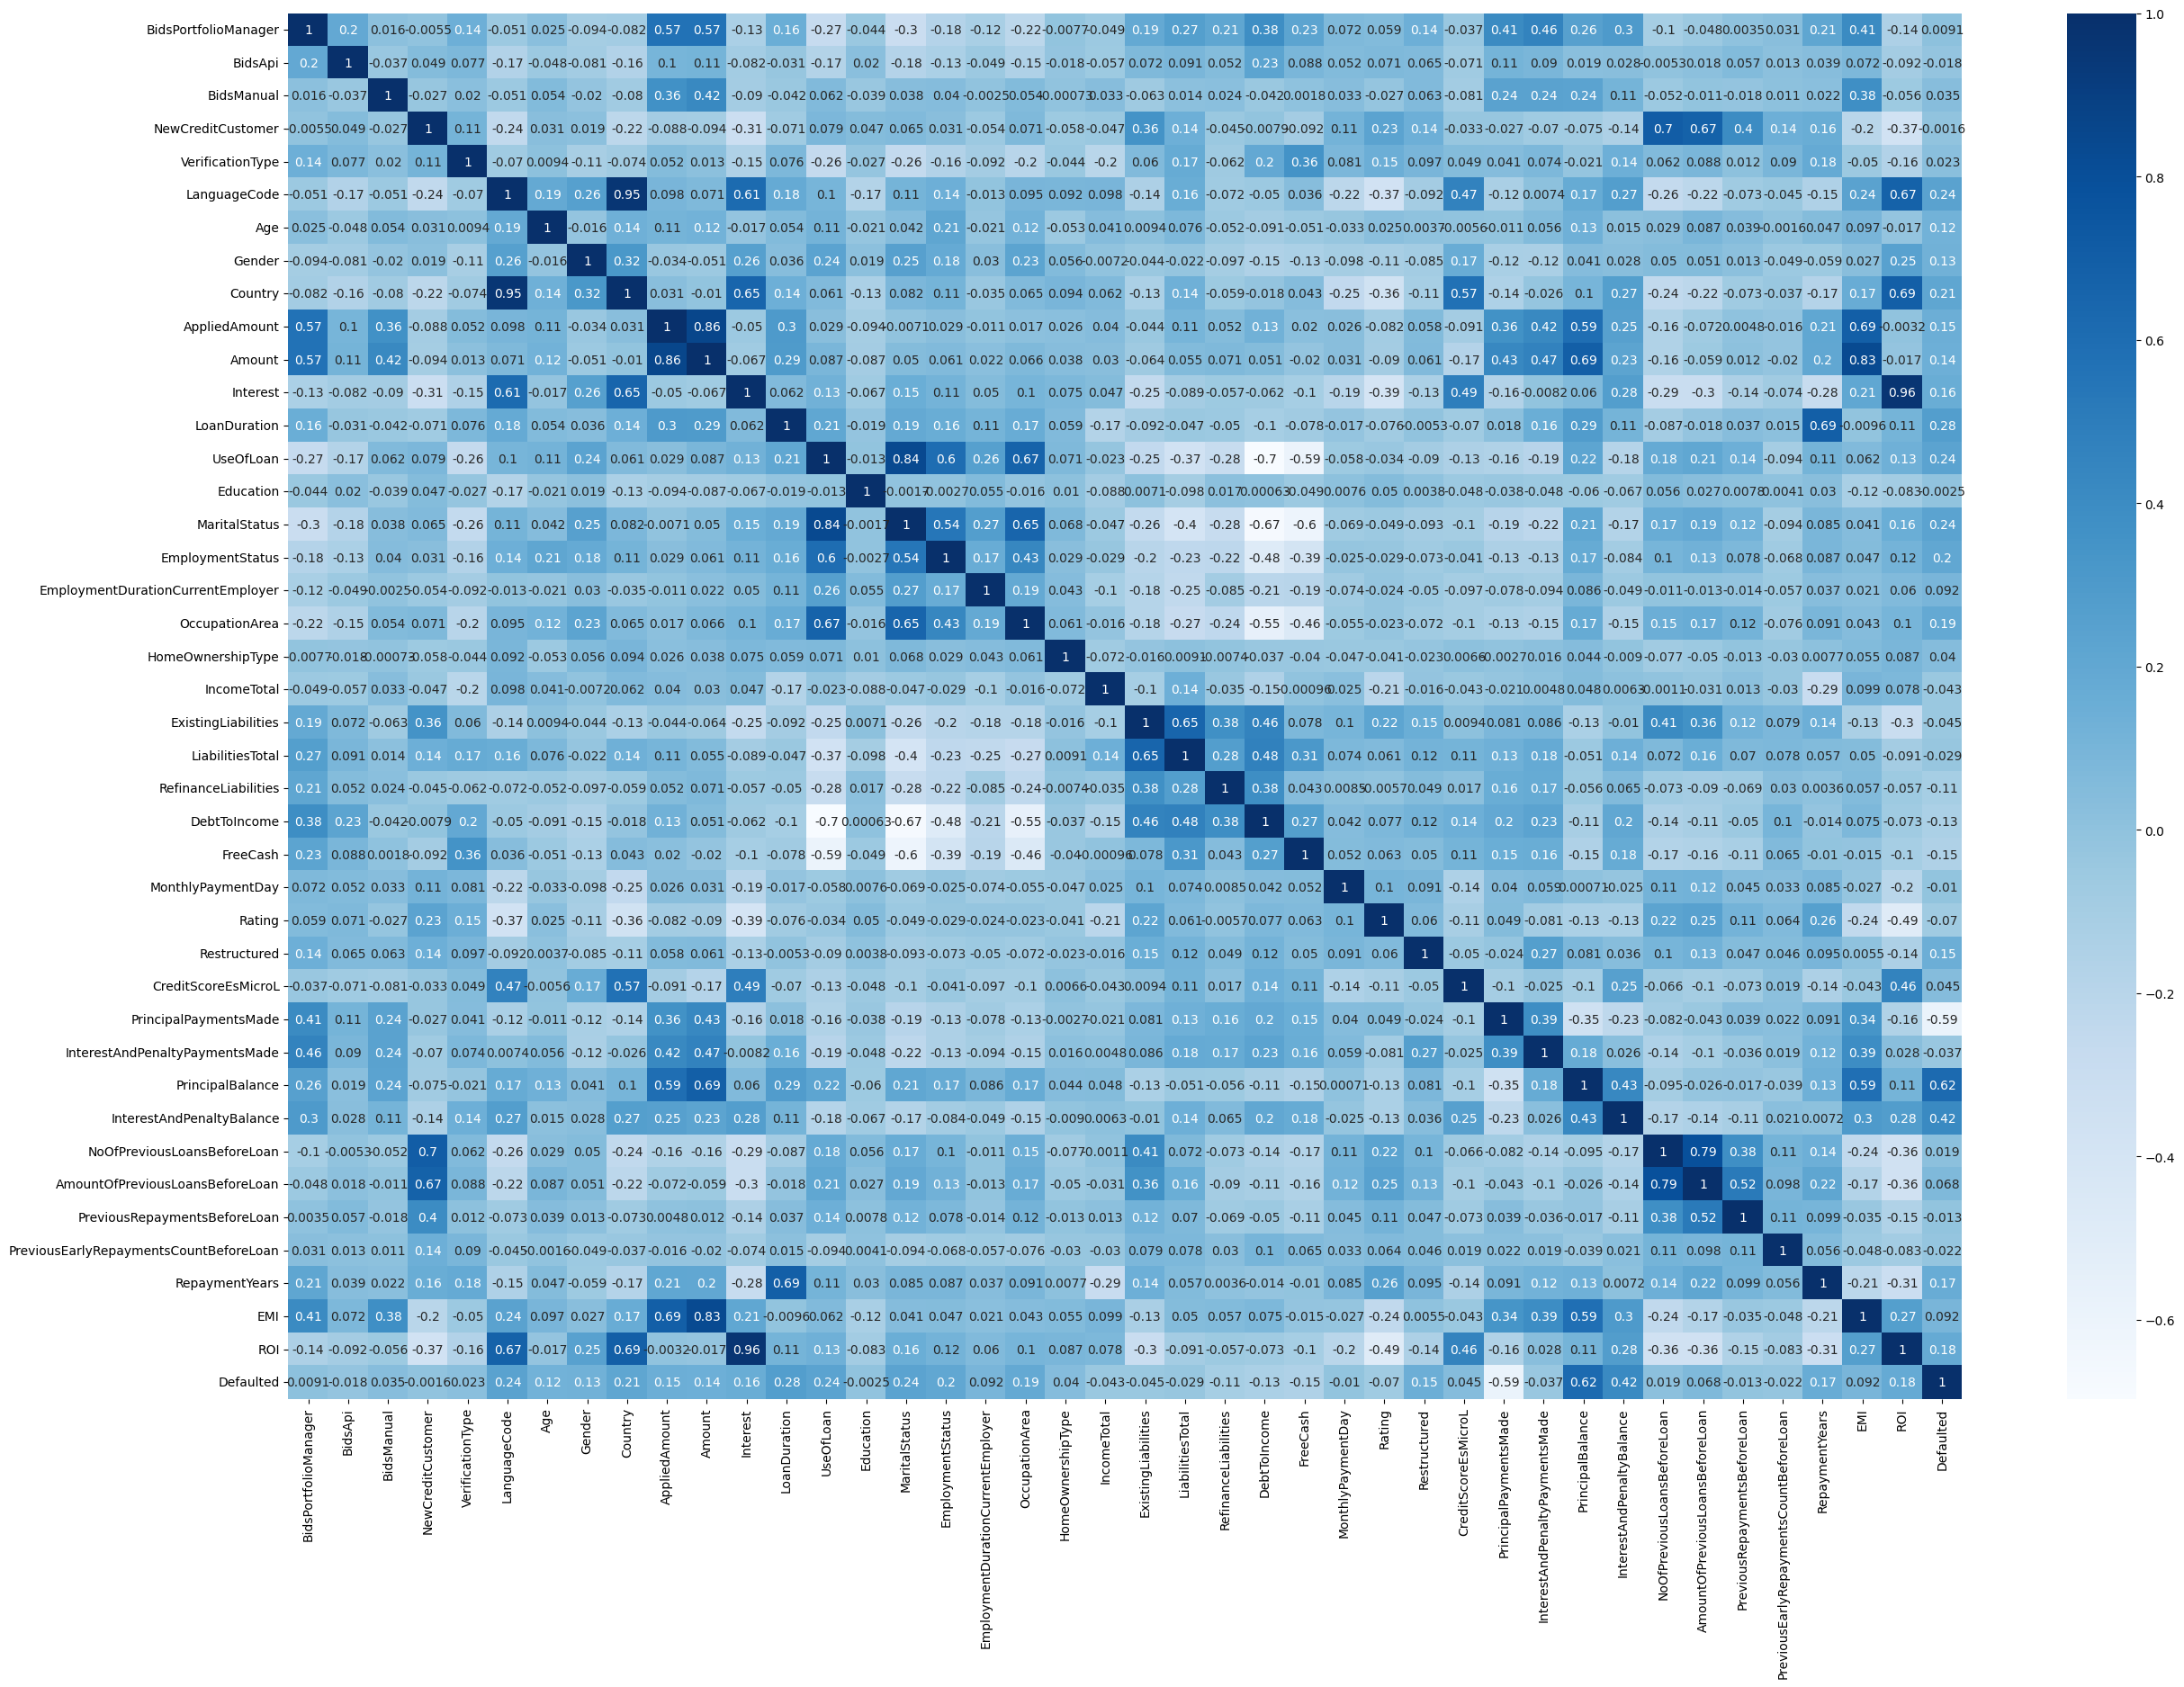

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap( Reg_DF_Full.corr(), annot=True, cmap='Blues')

## **With All Features**

### **Predicting Repayment Years**

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
])

In [ ]:
X = Reg_DF_Full.drop(columns=["EMI","ROI"]).copy()
y = X.pop("RepaymentYears")


X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0                 -1.030708 -0.593521   -0.260570           1.271764   
1                 -1.237991  0.620208   -0.225605          -0.786309   
2                 -0.387472 -0.593521   -0.947637          -0.786309   
3                 -0.665098 -0.593521   -0.497752          -0.786309   
4                  1.949456 -0.593521    0.410093          -0.786309   
...                     ...       ...         ...                ...   
49351             -1.459562 -0.593521   -0.518137          -0.786309   
49352              0.836884  1.738151    0.446426          -0.786309   
49353              0.066982  0.620208    1.618675           1.271764   
49354              1.806703 -0.593521    0.540006          -0.786309   
49355              0.639796 -0.593521    1.058946          -0.786309   

       VerificationType  LanguageCode       Age    Gender   Country  \
0              0.788388     -1.043350 -1.427227  0.297836 -0.922139   
1             -0.747210      1.294364 -0.277525  0.297836  1.438798   
2             -0.747210      1.294364  1.358605  0.297836  1.438798   
3             -0.747210      1.294364  0.249822  2.345704  1.438798   
4              0.788388      0.791212  0.910169 -1.422207  0.662063   
...                 ...           ...       ...       ...       ...   
49351         -3.086048     -1.043350 -0.985535 -1.422207 -0.922139   
49352         -0.747210     -1.043350  0.558297  0.297836 -0.922139   
49353          0.788388      0.791212  1.107730  0.297836  0.662063   
49354          1.760993      0.791212 -0.985535  0.297836  0.662063   
49355         -0.747210      0.791212  0.702889  0.297836  0.662063   

       AppliedAmount    Amount  Interest  LoanDuration  UseOfLoan  Education  \
0          -1.260285 -1.256106 -1.449178     -0.717082   0.769012  -0.375336   
1           0.127010  0.242142  1.044472      1.025584   0.769012  -0.375336   
2          -1.260285 -1.256106  2.530602     -0.717082   0.769012   0.523511   
3           0.127010  0.242142  1.044472      1.025584   0.769012   0.523511   
4           1.391974  1.587861 -0.641073     -0.717082  -1.416314  -0.375336   
...              ...       ...       ...           ...        ...        ...   
49351      -1.619484 -1.716625 -0.193271     -1.471547  -1.325990  -0.375336   
49352       0.438172  0.563197 -1.564990      1.025584   0.769012   0.523511   
49353       1.157168  1.327929  0.139271     -0.717082   0.769012  -0.375336   
49354       1.186194  1.359768 -0.368680      1.025584  -1.325990  -1.433045   
49355       1.322525  1.510411  1.098474      1.025584   0.769012  -1.433045   

       MaritalStatus  EmploymentStatus  EmploymentDurationCurrentEmployer  \
0           0.776932          0.481957                           1.639970   
1           0.776932          0.481957                          -0.938775   
2           0.776932          0.481957                          -0.938775   
3           0.776932          0.481957                           0.990529   
4          -0.943323          2.343072                          -0.938775   
...              ...               ...                                ...   
49351      -1.598886         -1.298548                          -1.606557   
49352       0.776932          0.481957                          -0.938775   
49353       0.776932          0.481957                           0.990529   
49354      -1.253538         -1.298548                           0.179706   
49355       0.776932          0.481957                           0.613735   

       OccupationArea  HomeOwnershipType  IncomeTotal  ExistingLiabilities  \
0            0.490311          -1.197482    -1.918418             0.920859   
1            0.490311           0.485141     0.124739            -1.424996   
2            0.490311           2.002720    -0.300249            -1.424996   
3            0.490311           0.042235    -0.300249            -0.150329   
4            

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

Modeling_Pipeline = Pipeline([
    ("Model", AdaBoostRegressor(random_state=0) ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.8966246661343333

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

pd.DataFrame(X_test, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0                 -1.260617 -0.163779    0.037302           1.271764   
1                 -0.387472 -0.443237   -0.952165          -0.786309   
2                  1.578578 -0.593521    1.054635          -0.786309   
3                 -0.538828 -0.593521    1.200902          -0.786309   
4                  1.642717  1.027925   -0.088052           1.271764   
...                     ...       ...         ...                ...   
16448             -0.250329  2.264807    0.283294           1.271764   
16449              0.681659 -0.593521    1.086363          -0.786309   
16450              0.806604  0.424152   -0.455319          -0.786309   
16451             -1.148790 -0.034056    1.305990          -0.786309   
16452              1.218897  0.877959    1.419740          -0.786309   

       VerificationType  LanguageCode       Age    Gender   Country  \
0              0.788388     -1.043350  0.483787  0.297836 -0.922139   
1             -0.747210     -1.043350  0.249822  0.297836 -0.922139   
2             -0.747210      0.791212  1.882179  0.297836  0.662063   
3             -0.747210      1.294364  0.249822  0.297836  1.438798   
4              1.760993      0.791212 -0.003469  0.297836  0.662063   
...                 ...           ...       ...       ...       ...   
16448         -0.747210     -1.043350 -1.093613  0.297836 -0.922139   
16449          1.760993      0.791212  1.538795  0.297836  0.662063   
16450         -0.747210      0.791212  1.107730 -1.422207  0.662063   
16451          0.788388     -0.367028  0.910169  0.297836 -0.922139   
16452          0.788388      0.791212 -0.003469  0.297836  0.662063   

       AppliedAmount    Amount  Interest  LoanDuration  UseOfLoan  Education  \
0          -1.260285 -1.256106 -0.601853     -1.678435   0.769012  -1.433045   
1          -1.260285 -1.256106 -0.092609     -0.717082   0.769012  -1.433045   
2           0.985496  1.141246 -0.817619      1.025584  -1.416314   0.523511   
3           0.127667  0.242828  1.406280      1.025584   0.769012  -0.375336   
4           1.597557  1.022401 -0.212138      1.025584  -1.492890   1.286193   
...              ...       ...       ...           ...        ...        ...   
16448      -0.436458 -0.358032  0.082674      1.025584   0.769012   0.523511   
16449       0.687399  0.262562  0.474557      1.025584  -1.082600  -1.433045   
16450      -0.262660 -0.170913 -1.685702     -0.717082   0.769012  -1.433045   
16451      -0.527770 -0.456805 -0.601853     -1.678435   0.769012  -0.375336   
16452       1.157168  1.327929 -0.247488      0.002016   0.769012  -0.375336   

       MaritalStatus  EmploymentStatus  EmploymentDurationCurrentEmployer  \
0           0.776932          0.481957                           0.990529   
1           0.776932          0.481957                           0.613735   
2          -1.454755          3.290829                          -1.606557   
3           0.776932          0.481957                           0.990529   
4          -1.598886         -1.298548                          -0.339443   
...              ...               ...                                ...   
16448       0.776932          0.481957                          -1.606557   
16449      -0.943323         -1.298548                          -0.938775   
16450       0.776932          0.481957                          -0.938775   
16451       0.776932          0.481957                          -0.938775   
16452       0.776932          0.481957                           0.613735   

       OccupationArea  HomeOwnershipType  IncomeTotal  ExistingLiabilities  \
0            0.490311          -1.197482    -0.689277            -0.728228   
1            0.490311           0.042235    -1.335720            -0.150329   
2            1.589544          -1.197482     1.140264             0.307081   
3            0.490311           1.128268     0.655104            -0.728228   
4            

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.8947576787665265

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.8947576787665265


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  0.00037222505050486267
RMSE :  0.01929313480243329


In [ ]:
results = list(zip(X, Modeling_Pipeline['Model'].feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([0.41666667, 0.52333228, 0.58177113, ..., 0.5431996 , 0.41666667,
       0.54917015])

### **Predicting EMI(Monthly Payment)**

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
])

In [ ]:
X = Reg_DF_Full.drop(columns=["RepaymentYears","ROI"]).copy()
y = X.pop("EMI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", AdaBoostRegressor(random_state=0) ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.6265537442582457

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.6358083718287262

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.6358083718287262


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  2128.8589114629863
RMSE :  46.139559073131444


In [ ]:
results = list(zip(X, Modeling_Pipeline['Model'].feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([ 89.06315929, 161.56342442, 109.25796192, ...,  81.49231446,
       109.96664466,  87.82952016])

### **Predicting ROI**

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
])

In [ ]:
X = Reg_DF_Full.drop(columns=["RepaymentYears","EMI"]).copy()
y = X.pop("ROI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", AdaBoostRegressor(random_state=0) ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.9942703525001851

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.9942739433545759

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.9942739433545759


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  0.6278466998535277
RMSE :  0.7923677806760745


In [ ]:
results = list(zip(X, Modeling_Pipeline['Model'].feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([11.63623485, 12.3484068 , 26.75199925, ..., 56.06719625,
       23.69995726, 35.83396893])

##**With Reduced Features**

In [ ]:
Reduced_Cols = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'LanguageCode', 'Age',
       'Interest', 'LoanDuration', 'Education',
       'MaritalStatus', 'EmploymentDurationCurrentEmployer',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'Rating', 'PreviousRepaymentsBeforeLoan',"Amount","RepaymentYears","ROI","EMI"]

reduced_X = Reg_DF_Full[Reduced_Cols]

In [ ]:
reduced_df = Reg_DF_Full.loc[:, Reduced_Cols ]
reduced_df

BidsPortfolioManager  BidsApi  BidsManual  LanguageCode  Age  Interest  \
0                         0        0    115.0410             0   61    0.3000   
1                         0        0    140.6057             0   48    0.2500   
2                         0        0    319.5580             0   58    0.2500   
4                         0        0    319.5582             0   25    0.3000   
5                         0        0    300.3845             0   22    0.3000   
...                     ...      ...         ...           ...  ...       ...   
73899                  2515        0    485.0000             3   37    0.3101   
73900                  1880        0   1120.0000             3   35    0.1825   
73901                  1975        0    525.0000             3   40    0.2483   
73902                  1840        0   1160.0000             0   47    0.1774   
73903                  2990        0     10.0000             0   21    0.3050   

       LoanDuration  Education  MaritalStatus  \
0                12          0              0   
1                 1          1              1   
2                20          2              0   
4                12          2              2   
5                24          2              3   
...             ...        ...            ...   
73899            60          0              3   
73900            60          0              3   
73901            60          0              0   
73902            60          1              0   
73903            60          2              3   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  IncomeTotal  \
0                                      0                  0      10500.0   
1                                      1                  0      10800.0   
2                                      2                  0       7000.0   
4                                      3                  0       6800.0   
5                                      3                  0       9500.0   
...                                  ...                ...          ...   
73899                                  1                  4       1400.0   
73900                                  1                  0       2265.0   
73901                                  1                  0       2500.0   
73902                                  1                  1        540.0   
73903                                  0                  2        500.0   

       ExistingLiabilities  LiabilitiesTotal  DebtToIncome  FreeCash  \
0                        0              0.00          0.00      0.00   
1                        0              0.00          0.00      0.00   
2                        0              0.00          0.00      0.00   
4                        0              0.00          0.00      0.00   
5                        0              0.00          0.00      0.00   
...                    ...               ...           ...       ...   
73899                    1            500.00          7.69    792.32   
73900                    5           1777.46         31.58    520.67   
73901                    2           1350.00          3.22   1069.58   
73902                    8            732.05         44.35     50.49   
73903                    5            531.03         35.03     74.86   

       MonthlyPaymentDay  Rating  PreviousRepaymentsBeforeLoan     Amount  \
0                     25       0                        0.0000   115.0408   
1                     15       0                      258.6256   140.6057   
2                     25       0                        0.0000   319.5409   
4                     25       0                        0.0000   319.5436   
5                      9       0                        0.0000   300.4314   
...                  ...     ...                           ...        ...   
73899                  1       4                        0.0000  3000.0000   
73900                  7       6                   

### **Predicting Repayment Years**

In [ ]:
X = reduced_df.drop(columns=["EMI","ROI"]).copy()
y = X.pop("RepaymentYears")


X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  LanguageCode       Age  \
0                 -1.030708 -0.593521   -0.260570     -1.043350 -1.427227   
1                 -1.237991  0.620208   -0.225605      1.294364 -0.277525   
2                 -0.387472 -0.593521   -0.947637      1.294364  1.358605   
3                 -0.665098 -0.593521   -0.497752      1.294364  0.249822   
4                  1.949456 -0.593521    0.410093      0.791212  0.910169   
...                     ...       ...         ...           ...       ...   
49351             -1.459562 -0.593521   -0.518137     -1.043350 -0.985535   
49352              0.836884  1.738151    0.446426     -1.043350  0.558297   
49353              0.066982  0.620208    1.618675      0.791212  1.107730   
49354              1.806703 -0.593521    0.540006      0.791212 -0.985535   
49355              0.639796 -0.593521    1.058946      0.791212  0.702889   

       Interest  LoanDuration  Education  MaritalStatus  \
0     -1.449178     -0.717082  -0.375336       0.776932   
1      1.044472      1.025584  -0.375336       0.776932   
2      2.530602     -0.717082   0.523511       0.776932   
3      1.044472      1.025584   0.523511       0.776932   
4     -0.641073     -0.717082  -0.375336      -0.943323   
...         ...           ...        ...            ...   
49351 -0.193271     -1.471547  -0.375336      -1.598886   
49352 -1.564990      1.025584   0.523511       0.776932   
49353  0.139271     -0.717082  -0.375336       0.776932   
49354 -0.368680      1.025584  -1.433045      -1.253538   
49355  1.098474      1.025584  -1.433045       0.776932   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  IncomeTotal  \
0                               1.639970          -1.197482    -1.918418   
1                              -0.938775           0.485141     0.124739   
2                              -0.938775           2.002720    -0.300249   
3                               0.990529           0.042235    -0.300249   
4                              -0.938775           1.128268     1.441784   
...                                  ...                ...          ...   
49351                          -1.606557          -1.197482     2.425180   
49352                          -0.938775          -1.197482     0.441399   
49353                           0.990529          -1.197482     1.420782   
49354                           0.179706          -0.521362     0.748041   
49355                           0.613735           1.128268     1.420782   

       ExistingLiabilities  LiabilitiesTotal  DebtToIncome  FreeCash  \
0                 0.920859         -0.567517     -0.714692 -0.666003   
1                -1.424996         -1.367506     -0.714692 -0.666003   
2                -1.424996         -1.367506     -0.714692 -0.666003   
3                -0.150329         -0.594495     -0.714692 -0.666003   
4                 0.307081          1.936391      0.854278  1.767399   
...                    ...               ...           ...       ...   
49351            -1.424996         -1.367506     -0.714692 -0.666003   
49352            -0.728228         -0.712469     -0.714692 -0.666003   
49353             0.307081          0.400389     -0.714692 -0.666003   
49354            -0.728228          0.545354      0.578040  1.859506   
49355            -0.150329          1.832540     -0.714692 -0.666003   

       MonthlyPaymentDay    Rating  PreviousRepaymentsBeforeLoan    Amount  
0              -0.077823  1.604937                      0.257480 -1.256106  
1               0.590175 -1.324167                      0.671970  0.242142  
2               0.336248 -0.104155                     -1.103706 -1.256106  
3              -1.200466 -1.324167                      0.671970  0.242142  
4               1.705076  0.399159                     -1.103706  1.587861  
...                  ...       ...                           ...       ...  
49351           0.947417 -1.324167                     -

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", AdaBoostRegressor(random_state=0) ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.8671888351463071

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

pd.DataFrame(X_test, columns =X.columns)

BidsPortfolioManager   BidsApi  BidsManual  LanguageCode       Age  \
0                 -1.260617 -0.163779    0.037302     -1.043350  0.483787   
1                 -0.387472 -0.443237   -0.952165     -1.043350  0.249822   
2                  1.578578 -0.593521    1.054635      0.791212  1.882179   
3                 -0.538828 -0.593521    1.200902      1.294364  0.249822   
4                  1.642717  1.027925   -0.088052      0.791212 -0.003469   
...                     ...       ...         ...           ...       ...   
16448             -0.250329  2.264807    0.283294     -1.043350 -1.093613   
16449              0.681659 -0.593521    1.086363      0.791212  1.538795   
16450              0.806604  0.424152   -0.455319      0.791212  1.107730   
16451             -1.148790 -0.034056    1.305990     -0.367028  0.910169   
16452              1.218897  0.877959    1.419740      0.791212 -0.003469   

       Interest  LoanDuration  Education  MaritalStatus  \
0     -0.601853     -1.678435  -1.433045       0.776932   
1     -0.092609     -0.717082  -1.433045       0.776932   
2     -0.817619      1.025584   0.523511      -1.454755   
3      1.406280      1.025584  -0.375336       0.776932   
4     -0.212138      1.025584   1.286193      -1.598886   
...         ...           ...        ...            ...   
16448  0.082674      1.025584   0.523511       0.776932   
16449  0.474557      1.025584  -1.433045      -0.943323   
16450 -1.685702     -0.717082  -1.433045       0.776932   
16451 -0.601853     -1.678435  -0.375336       0.776932   
16452 -0.247488      0.002016  -0.375336       0.776932   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  IncomeTotal  \
0                               0.990529          -1.197482    -0.689277   
1                               0.613735           0.042235    -1.335720   
2                              -1.606557          -1.197482     1.140264   
3                               0.990529           1.128268     0.655104   
4                              -0.339443           0.485141     0.971444   
...                                  ...                ...          ...   
16448                          -1.606557          -0.521362    -1.641876   
16449                          -0.938775          -0.521362     0.520928   
16450                          -0.938775          -1.197482     0.721009   
16451                          -0.938775          -1.197482    -0.487788   
16452                           0.613735           0.485141     2.085534   

       ExistingLiabilities  LiabilitiesTotal  DebtToIncome  FreeCash  \
0                -0.728228         -0.981604     -0.714692 -0.666003   
1                -0.150329         -0.308734     -0.714692 -0.666003   
2                 0.307081          1.289290      0.188635  1.866519   
3                -0.728228         -0.199118     -0.714692 -0.666003   
4                 0.307081          1.191355      1.424089  1.830999   
...                    ...               ...           ...       ...   
16448            -1.424996         -1.367506     -0.714692 -0.666003   
16449             0.307081          0.941448      1.431183  1.775876   
16450            -0.150329          0.857931     -0.714692 -0.666003   
16451            -1.424996         -1.367506     -0.714692 -0.666003   
16452            -0.150329          1.101567     -0.714692 -0.666003   

       MonthlyPaymentDay    Rating  PreviousRepaymentsBeforeLoan    Amount  
0               0.336248 -0.683182                      0.671970 -1.256106  
1               0.336248  0.399159                     -1.103706 -1.256106  
2               1.705076 -0.683182                     -1.103706  1.141246  
3              -1.375173 -1.324167                      0.671970  0.242828  
4               1.806817  0.838306                      0.442210  1.022401  
...                  ...       ...                           ...       ...  
16448           1.173233  0.838306                      

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.8650455676722519

In [ ]:
print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.8650455676722519


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  0.0004773119767817678
RMSE :  0.021847470718180807


In [ ]:
results = list(zip(X, Modeling_Pipeline['Model'].feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([0.41666667, 0.5283391 , 0.58179214, ..., 0.53707051, 0.41666667,
       0.54885356])

### **Predicting EMI(Monthly Payment)**

In [ ]:
X = reduced_df.drop(columns=["RepaymentYears","ROI"]).copy()
y = X.pop("EMI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", AdaBoostRegressor(random_state=0, n_estimators=50, learning_rate=0.1) ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.8356853593322179

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.8369787490746374

In [ ]:
print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.8369787490746374


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  952.9303145515734
RMSE :  30.86956939368564


In [ ]:
results = list(zip(X, Modeling_Pipeline['Model'].feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([ 38.16668938, 160.09668921,  94.79107266, ...,  38.16668938,
        45.80834987,  38.16668938])

### **Predicting ROI**

In [ ]:
X = reduced_df.drop(columns=["RepaymentYears","EMI"]).copy()
y = X.pop("ROI")


X_train, X_test, y_train, y_test = train_test_split( X , y, random_state=0 )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
Modeling_Pipeline = Pipeline([
    ("Model", AdaBoostRegressor(random_state=0) ),
])

Modeling_Pipeline.fit(X_train,y_train)
Modeling_Pipeline.score(X_train,y_train)

0.994270352500185

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.9942739433545758

In [ ]:
print(r2_score(y_test, Modeling_Pipeline.predict(X_test)))

0.9942739433545758


In [ ]:
print("MSE : " ,mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)))
print("RMSE : " , mean_squared_error(y_test, Modeling_Pipeline.predict(X_test)) **(0.5) )

MSE :  0.6278466998535382
RMSE :  0.7923677806760812


In [ ]:
results = list(zip(X, Modeling_Pipeline['Model'].feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
Modeling_Pipeline.predict(X_test)

array([11.63623485, 12.3484068 , 26.75199925, ..., 56.06719625,
       23.69995726, 35.83396893])